## <a name="introduction">1. Introduction</a>

#### Business Problem
Our objective is to identify factors that contribute to passenger satisfaction or dissatisfaction, so that the airline can address them to enhance customer service and improve customer retention.


### Preliminary Dependency Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Graphing Parameters

In [2]:
from matplotlib import rcParams

# Font Size
rcParams['font.size'] = 12
# Figure Size
rcParams['figure.figsize'] = 7, 5

### Data Imports

##### Training data import

In [3]:
train_df = pd.read_csv('train.csv')

In [4]:
train_df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [5]:
train_df.satisfaction.value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

##### Test data import

In [6]:
test_df = pd.read_csv('test.csv')

In [7]:
test_df.head()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                                  0  ...                       2   
3                                  0  ...                       1   
4                                  3  ...                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied  

[5 rows x 25 columns]

## <a name="initial-cleaning">2. Initial Data Cleaning</a>

### Examining initial dataframes

In [8]:
# Training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [9]:
# Test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [10]:
# Checking values of scored columns, using cleanliness as score to test
train_df.Cleanliness.value_counts()

Cleanliness
4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: count, dtype: int64

### Observations
#### Unneeded columns
The columns ```Unnamed: 0``` and ```id``` are of no use to us, so they can be dropped right away. For the sake of efficiency, we'll apply this dataframe manipulation to both the training and testing datasets.
#### Datatype corrections
Save for the 5 categorical variables that need to be converted before model ingestion, there is a data type mismatch in the delay columns. The arrival column is of a float datatype while the departure column is a whole integer datatype. Regardless of whether or not necessary, I will match the two datatypes as floats for consistency's sake when performing further analyses.

#### Null fills
In the training dataset, there are 310 missing values in the column detailing the on-time performance of a particular voyage (```Arrival Delay in Minutes```). We can observe 83 values missing in the test set in this same column.
<br>

Since we cannot accurately decide whether or not a null value indicates that the trip was not delayed, we will fill this with the mean value of the column. 

#### Zero values in ranked value columns
In examining the dataframe's first 5 rows, I can see rows where there is a value of 0 found in columns that must be ranked on a scale from 1 to 5. For simplicity's sake - I will be dropping rows where a 0 value exists. This should reduce the complexity of our data set and also make it easier for the model to ingest later on.  

### Cleaning the dataframes

In [11]:
def clean_data(orig_df):
    '''
    This function applies 5 steps to the dataframe to clean the data.
    1. Dropping of unnecessary columns
    2. Uniformize datatypes in delay column
    3. Normalizing column names.
    4. Normalizing text values in columns.
    5. Imputing numeric null values with the mean value of the column.
    6. Dropping "zero" values from ranked categorical variables.
    7. Creating aggregated flight delay column
    
    
    Return: Cleaned DataFrame, ready for analysis - final encoding still to be applied.
    
    ''' 
    
    df = orig_df.copy()
    
    '''1. Dropping off unnecessary columns'''
    df.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
    
    '''2. Uniformizing datatype in delay column'''
    df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].astype(float)
    
    '''3. Normalizing column names'''
    df.columns = df.columns.str.lower()

    '''Replacing spaces and other characters with underscores, this is more 
    for us to make it easier to work with them and so that we can call them using dot notation.'''
    special_chars = "/ -" 
    for special_char in special_chars:
        df.columns = [col.replace(special_char, '_') for col in df.columns]
    
    '''4. Normalizing text values in columns'''
    cat_cols = ['gender', 'customer_type', 'class', 'type_of_travel', 'satisfaction']

    for column in cat_cols:
        df[column] = df[column].str.lower() 
        
    '''5. Imputing the nulls in the arrival delay column with the mean.
    Since we cannot safely equate these nulls to a zero value, the mean value of the column is the
    most sensible method of replacement.'''
    df['arrival_delay_in_minutes'].fillna(df['arrival_delay_in_minutes'].mean(), inplace = True)
    df.round({'arrival_delay_in_minutes' : 1})
    
    '''6. Dropping rows from ranked value columns where "zero" exists as a value
    Since these columns are meant to be ranked on a scale from 1 to 5, having zero as a value 
    does not make sense nor does it help us in any way.'''
    rank_list = ["inflight_wifi_service", "departure_arrival_time_convenient", "ease_of_online_booking", "gate_location",
                "food_and_drink", "online_boarding", "seat_comfort", "inflight_entertainment", "on_board_service",
                "leg_room_service", "baggage_handling", "checkin_service", "inflight_service", "cleanliness"]
    
    '''7. Creating aggregated and categorical flight delay columns'''
    df['total_delay_time'] = (df['departure_delay_in_minutes'] + df['arrival_delay_in_minutes'])
    df['was_flight_delayed'] = np.nan
    df['was_flight_delayed'] = np.where(df['total_delay_time'] > 0, 'yes', 'no')

    for col in rank_list:
        df.drop(df.loc[df[col]==0].index, inplace=True)
    
    cleaned_df = df
    
    return cleaned_df

#### Applying the transformations to our training dataset

In [12]:
train_cleaned = clean_data(train_df)

In [13]:
train_cleaned.head()

gender      customer_type  age   type_of_travel     class  flight_distance  \
0    male     loyal customer   13  personal travel  eco plus              460   
1    male  disloyal customer   25  business travel  business              235   
2  female     loyal customer   26  business travel  business             1142   
3  female     loyal customer   25  business travel  business              562   
4    male     loyal customer   61  business travel  business              214   

   inflight_wifi_service  departure_arrival_time_convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   ease_of_online_booking  gate_location  ...  leg_room_service  \
0                       3              1  ...                 3   
1                       3              3  ...                 5   
2                       2              2  ...                 3   
3                       5              5  ...                 5   
4                       3              3  ...                 4   

   baggage_handling  checkin_service  inflight_service  cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   departure_delay_in_minutes  arrival_delay_in_minutes  \
0                        25.0                      18.0   
1                         1.0                       6.0   
2                         0.0                       0.0   
3                        11.0                       9.0   
4                         0.0                       0.0   

              satisfaction  total_delay_time  was_flight_delayed  
0  neutral or dissatisfied              43.0                 yes  
1  neutral or dissatisfied               7.0                 yes  
2                satisfied               0.0                  no  
3  neutral or dissatisfied              20.0                 yes  
4                satisfied               0.0                  no  

[5 rows x 25 columns]

#### Applying to test set

In [14]:
test_cleaned = clean_data(test_df)

## <a name="exploratory-analysis">3. Exploratory Analysis</a>


### What proportion of customers are satisfied or dissatisfied?
Here I am checking of imbalance of outcome in our prediction column. This will inform whether or not additional steps will be needed before moving on (resampling, downsampling, etc.).

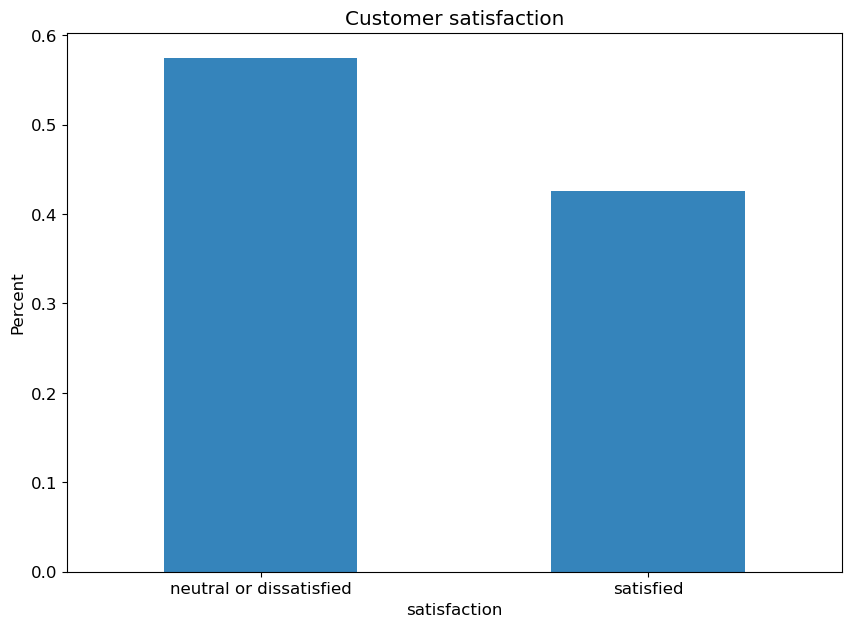

In [15]:
fig = plt.figure(figsize = (10,7))
train_cleaned.satisfaction.value_counts(normalize = True).plot(kind='bar', alpha = 0.9, rot=0)
plt.title('Customer satisfaction')
plt.ylabel('Percent')
plt.show()

**Observations** : The prediction columns are not completely even, as they are the ratio of dissatisfied to satisfied customers is 55 to 45. However, I would not say that the data presents itself as imbalanced. 
<br>

I can say that the data does not require additional treatment or resampling.

### What do customers currently think about their travel service?
What do the categorical variables look like? What is the spread of responses across the dataset?

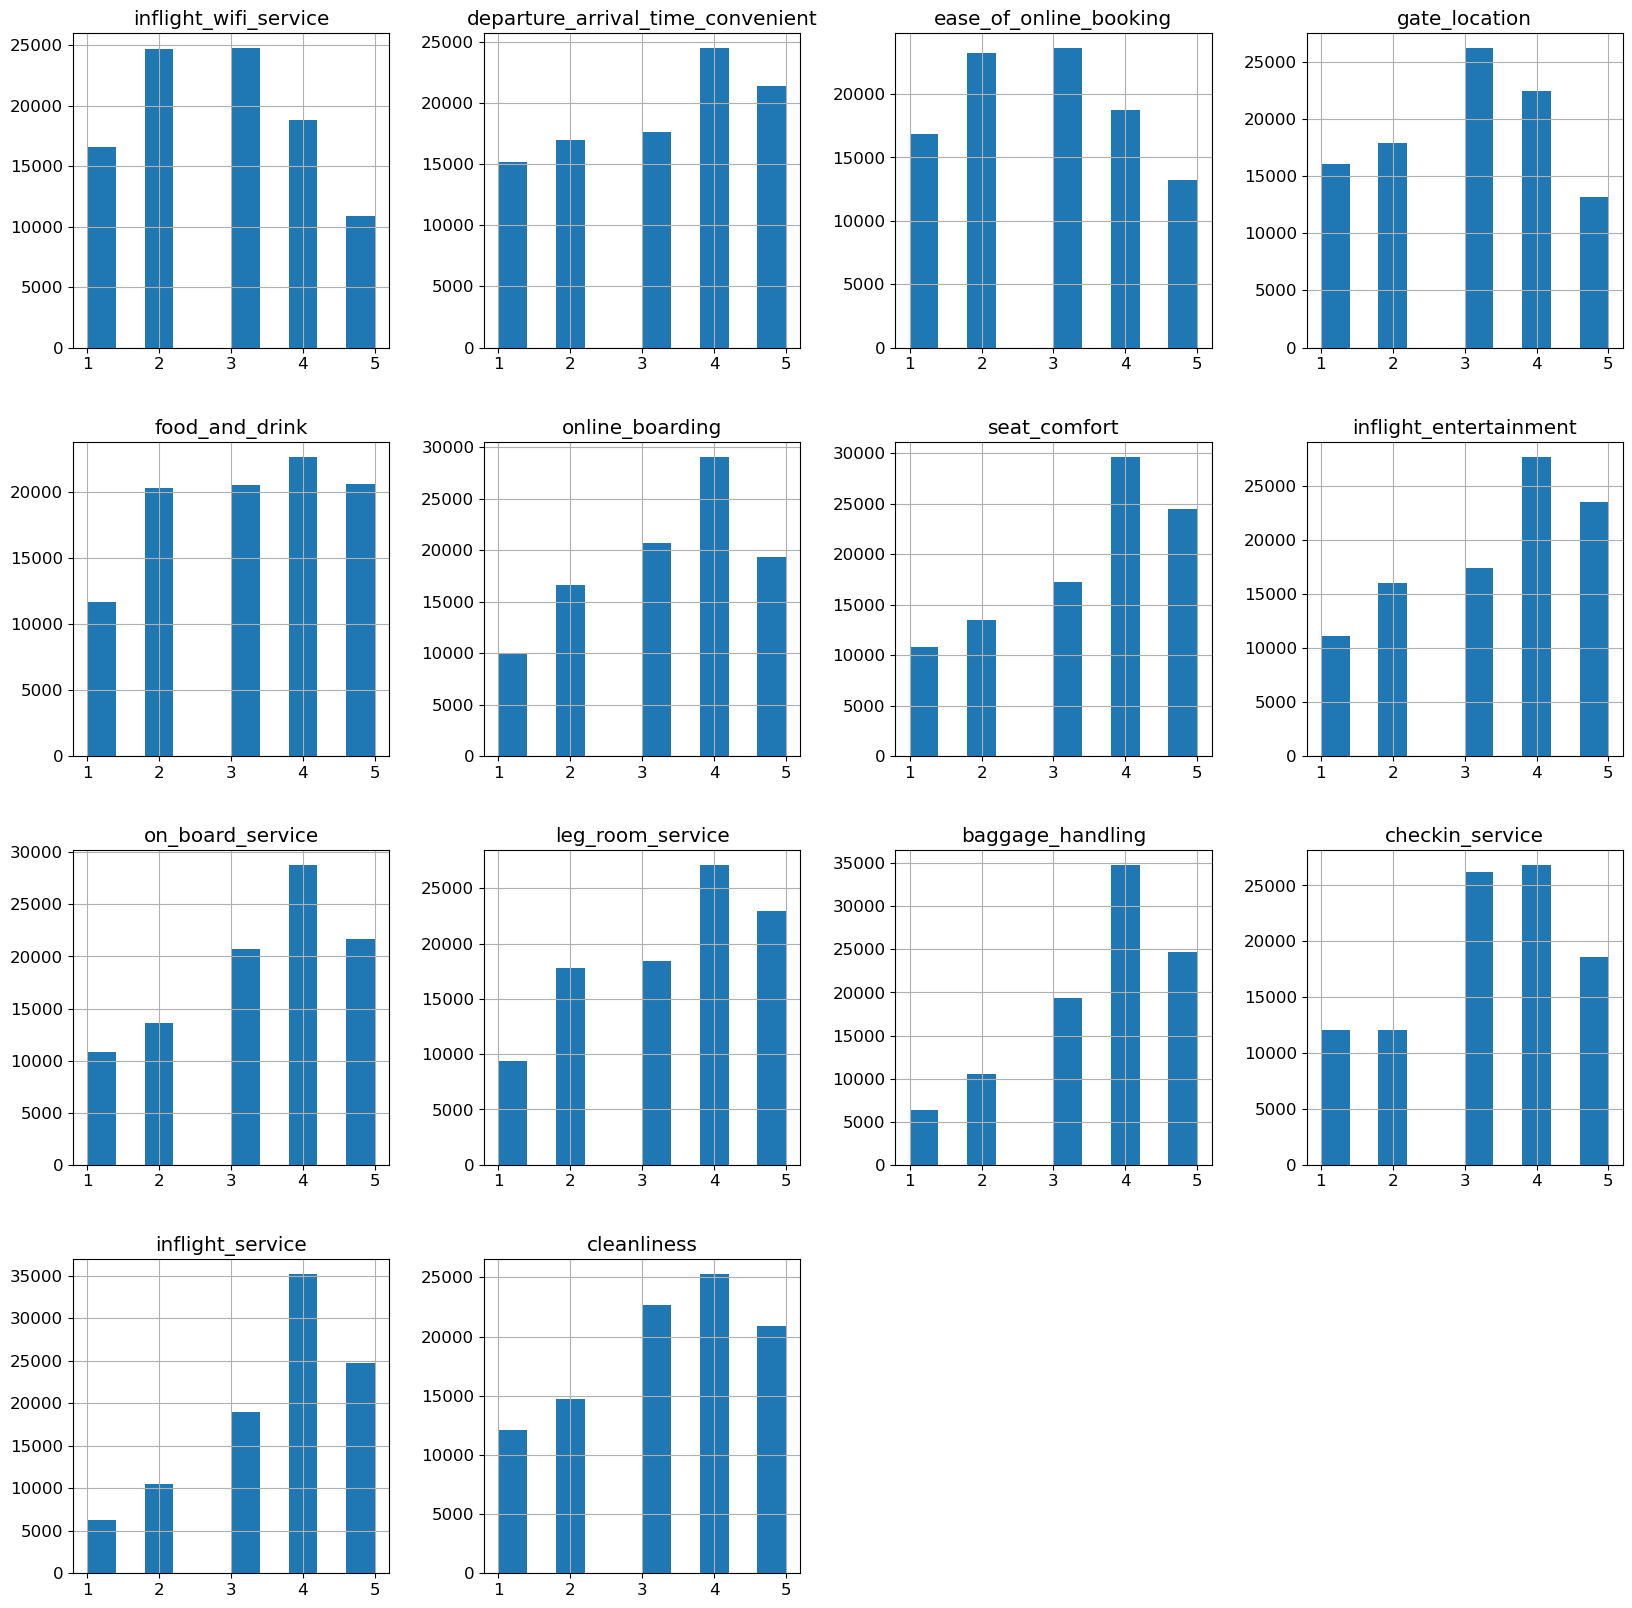

In [16]:
from matplotlib.pyplot import figure

categoricals = ["inflight_wifi_service", "departure_arrival_time_convenient", "ease_of_online_booking", 
                "gate_location", "food_and_drink", "online_boarding", "seat_comfort", "inflight_entertainment", 
                "on_board_service", "leg_room_service", "baggage_handling", "checkin_service", 
                "inflight_service", "cleanliness"]

train_cleaned.hist(column = categoricals, layout=(4,4), label='x', figsize = (20,20));

### Whigh groups are shown to be more satisfied with their travel experience? Men or women? Loyalty customers or casual fliers?

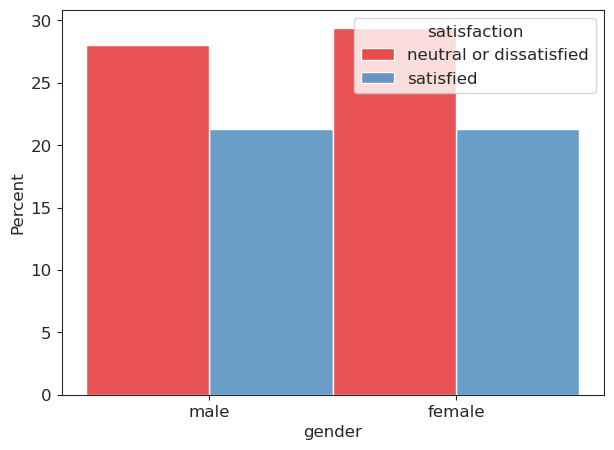

In [17]:
with sns.axes_style(style = 'ticks'):
    d = sns.histplot(x = "gender",  hue= 'satisfaction', data = train_cleaned,  
                     stat = 'percent', multiple="dodge", palette = 'Set1')

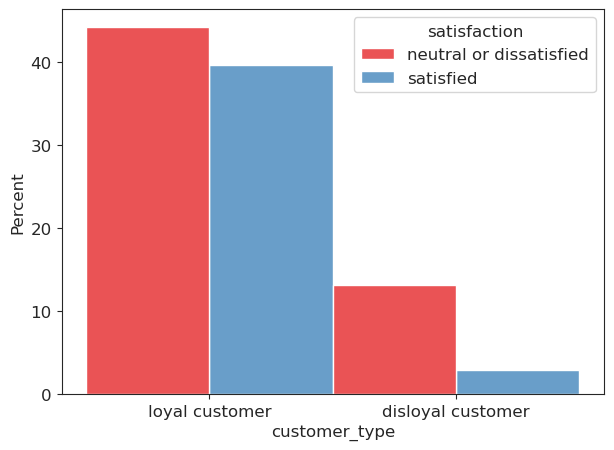

In [18]:
with sns.axes_style(style = 'ticks'):
    d = sns.histplot(x = "customer_type",  hue= 'satisfaction', data = train_cleaned, 
                     stat = 'percent', multiple="dodge", palette = 'Set1')

**Observations** : The gender groups are equally likely to be either satisfied or dissatisfied. This slight skewness reflects the proportions of the target variable.
<br>

Loyalty customers outweigh non-loyalty customers dramatically. However, among both groups - dissatisfied customers make up the majority class. 
<br>

There is no difference between the positive and negative outcomes of the target class among these two groups - something that suggests there could be a fundamental difference in these groups to tell us something. *Needs clearer wording*
<br>

While I'm not discounting these variables outright as far as feature importance is concerned, I don't believe that there are any ingsights to be gained from further analysis of these two variables.

### How do passengers in different cabins feel about their overall travel experience?

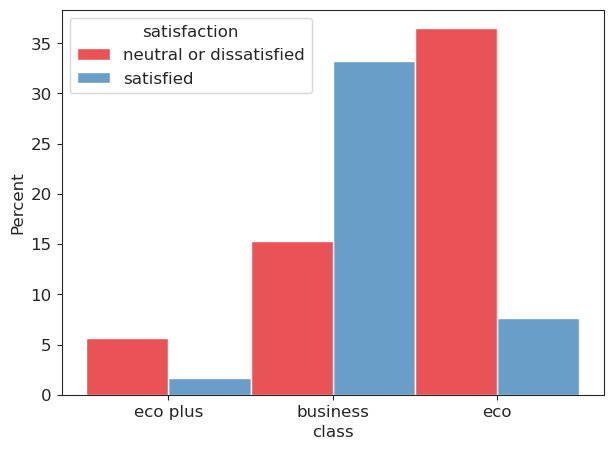

In [19]:
with sns.axes_style(style = 'ticks'):
    d = sns.histplot(x = "class",  hue= 'satisfaction', data = train_cleaned,
                     stat = 'percent', multiple="dodge", palette = 'Set1')

**Observations** : Passengers who travel in a business class cabin are far more likely to finish their trip with a positive impression than are those who fly in economy or economy plus/premium economy.
<br>

The dramatic difference in satisfaction between fliers in a business class cabin versus an economy type cabin suggests that there may be characteristic differences here informing these distributions. For that reason I'd like to examine this column further.

### Does the reason for travel have an impact as to whether or not a passenger is satisfied with their service?

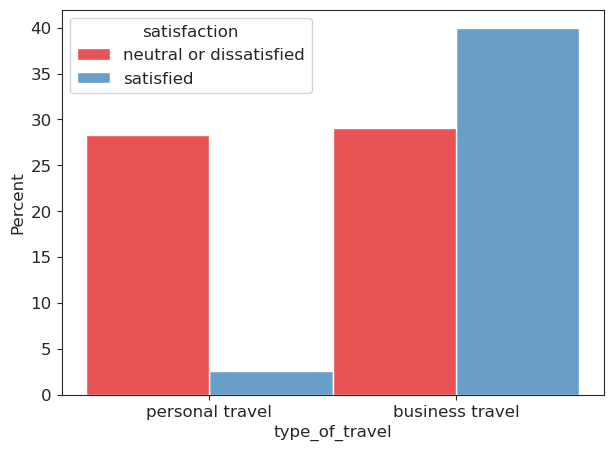

In [20]:
with sns.axes_style(style = 'ticks'):
    d = sns.histplot(x = "type_of_travel",  hue= 'satisfaction', data = train_cleaned,
                     stat = 'percent', multiple="dodge", palette = 'Set1')

**Observations** : Passengers travelling for business seem far more likely to be satisfied with the experience of their trip than those who travel for personal reasons. 
<br>

In both groups of this column, there are dramatic and inverse proportions regarding the positive and negative outcomes of the target variable — satisfied customers vs dissatisfied or neutral. 
<br>

This is another column where I think we can find great insights from further analyses.

### Are certain age groups more prone to be satisfied/dissatisfied with their travel experience?

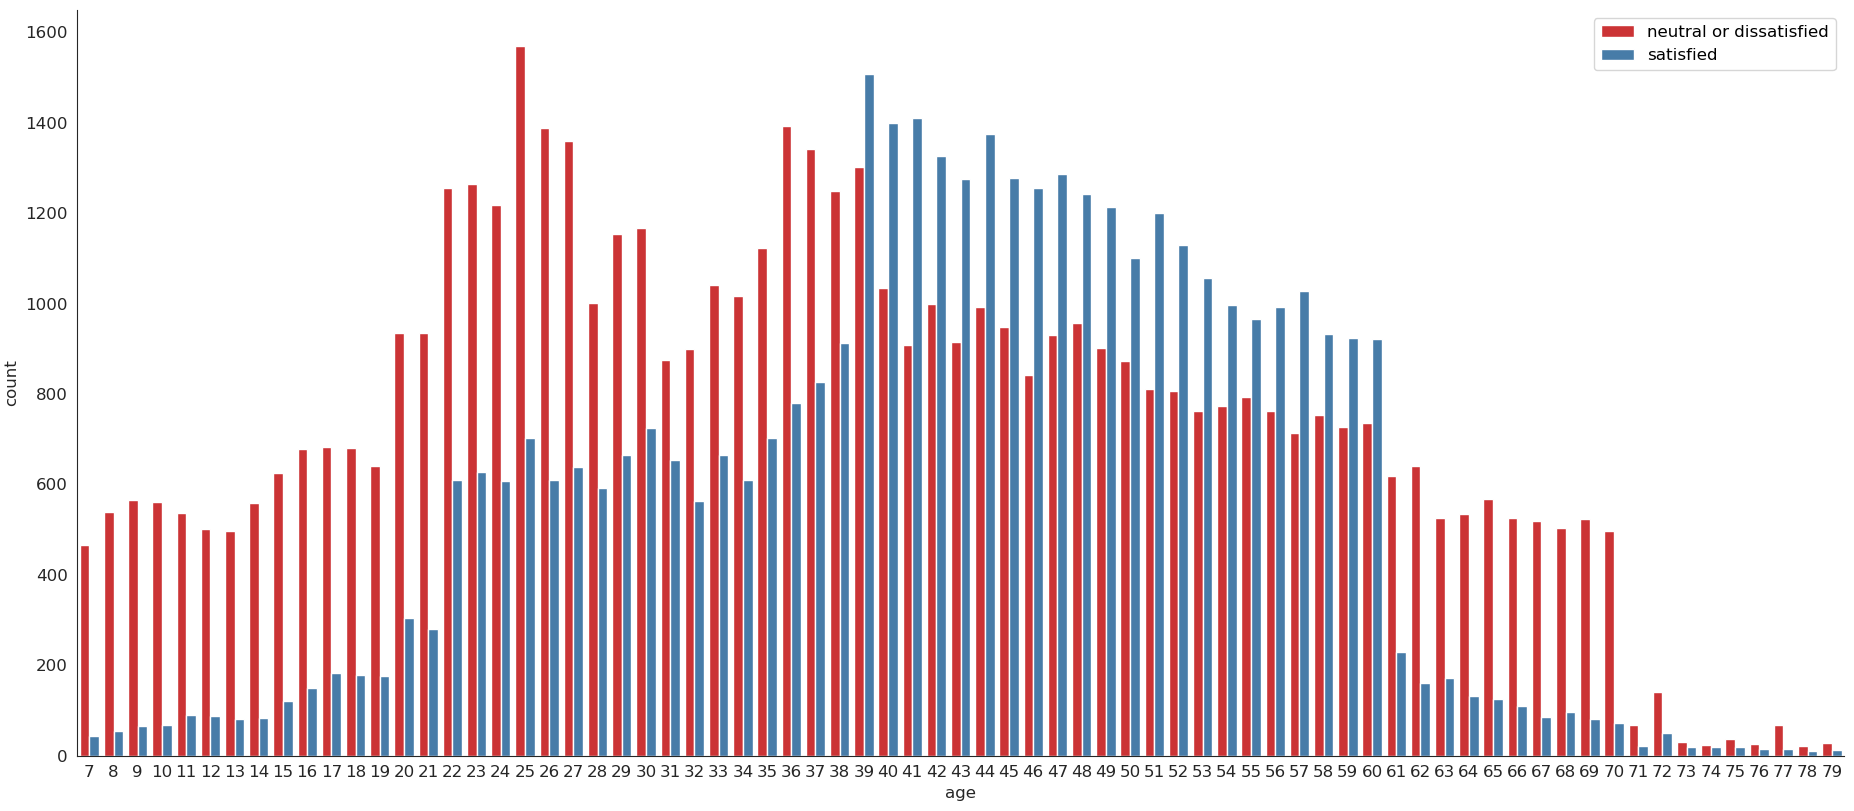

In [21]:
# Countplot comparing age to satisfaction
with sns.axes_style('white'):
    g = sns.catplot(x = 'age', data = train_cleaned,  
                    kind = 'count', hue = 'satisfaction', order = range(7, 80),
                    height = 8.27, aspect=18.7/8.27, legend = False,
                   palette = 'Set1')
    
plt.legend(loc='upper right');

<Axes: xlabel='satisfaction', ylabel='age'>

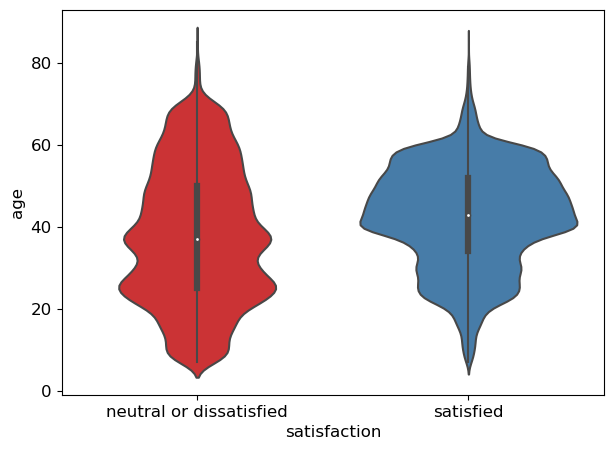

In [22]:
sns.violinplot(data = train_cleaned, x = "satisfaction", y = "age", palette='Set1')

**Observations** : Majority of age customers across all age groups are generally more dissatisfied/neutral regarding their trip experience. However, there is a group of customers ranging from age 38 to 61 who are generally satisfied with their trip experience. 
<br>

As with the previous two columns, the discrepancy points to potential insights to be unearthed by conducting further analyses.

#### Comparing satisfaction across different ages in cabin flown

<Axes: xlabel='class', ylabel='age'>

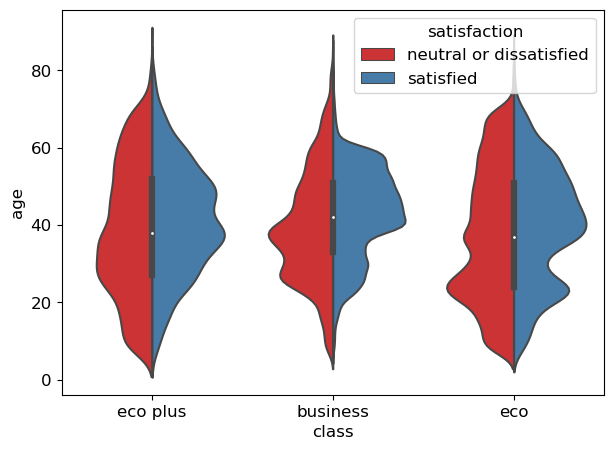

In [23]:
sns.violinplot(data = train_cleaned, x = "class", y = "age", 
               hue = 'satisfaction', palette = 'Set1', split = True)

### Does the distance traveled on a flight have any impact as to whether or not a customer is going to be satisfied?

<Axes: xlabel='satisfaction', ylabel='flight_distance'>

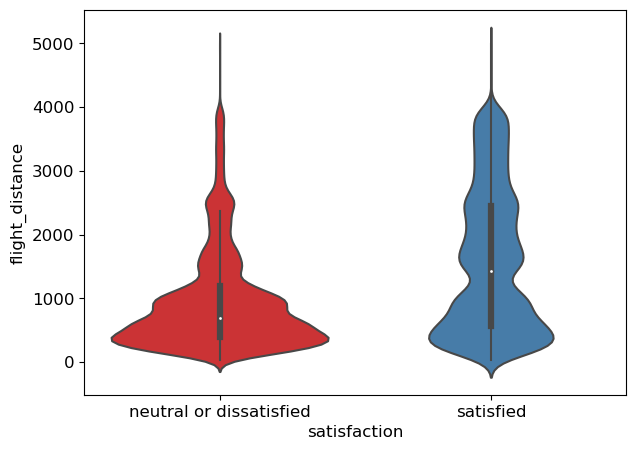

In [24]:
sns.violinplot(data = train_cleaned, x = "satisfaction", y = "flight_distance", palette = 'Set1')

<Axes: xlabel='class', ylabel='flight_distance'>

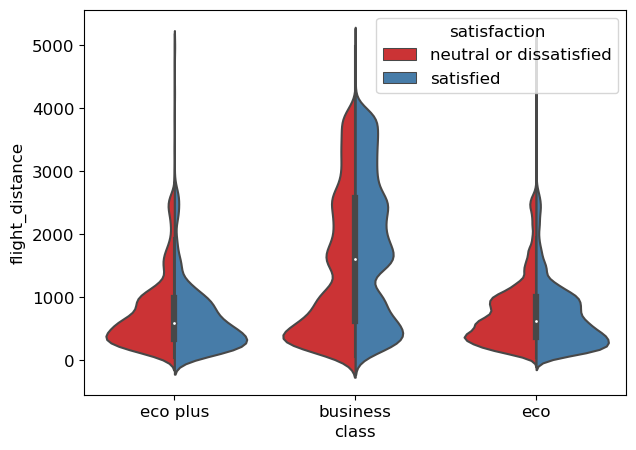

In [25]:
sns.violinplot(data = train_cleaned, x = "class", y = "flight_distance", 
               hue = 'satisfaction', palette = 'Set1', split = True)

### How much of a factor is on-time performance in determining satisfaction?

<Axes: xlabel='satisfaction', ylabel='arrival_delay_in_minutes'>

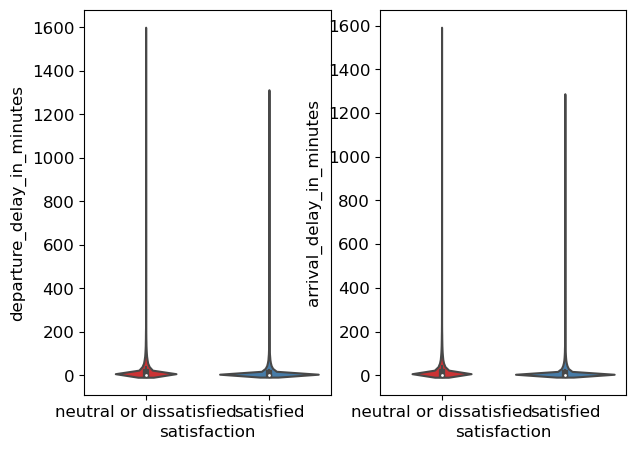

In [26]:
fig, axes = plt.subplots(1, 2)

sns.violinplot(data = train_cleaned, x = "satisfaction", 
               y = "departure_delay_in_minutes", ax = axes[0], palette = 'Set1')
sns.violinplot(data = train_cleaned, x = "satisfaction",
               y = "arrival_delay_in_minutes", ax = axes[1], palette = 'Set1')

##### Aggregated column

<Axes: xlabel='satisfaction', ylabel='total_delay_time'>

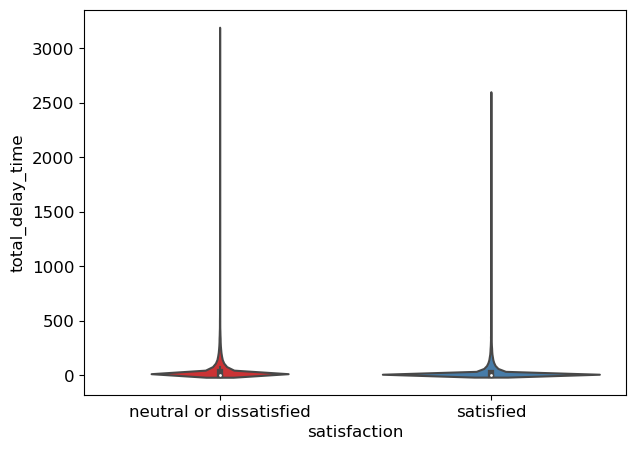

In [27]:
sns.violinplot(data = train_cleaned, x = "satisfaction", y = "total_delay_time", palette = 'Set1', split = True)

**Observations** : With a majority of flights not having significant delays, I don't believe this particularly is a factor determining passenger satisfaction. 

In [28]:
train_cleaned.was_flight_delayed.value_counts()

was_flight_delayed
yes    52436
no     43268
Name: count, dtype: int64

## <a name="multivariate-analysis">3.1 Multivariate Analysis</a>

#### Rated Score Columns

In [29]:
score_cols = ["inflight_wifi_service", "departure_arrival_time_convenient", "ease_of_online_booking", 
              "gate_location","food_and_drink", "online_boarding", "seat_comfort", "inflight_entertainment", 
              "on_board_service","leg_room_service", "baggage_handling", "checkin_service", "inflight_service",
              "cleanliness"]

### How do satisfied and dissatisfied customers score different parts of their travel experience?

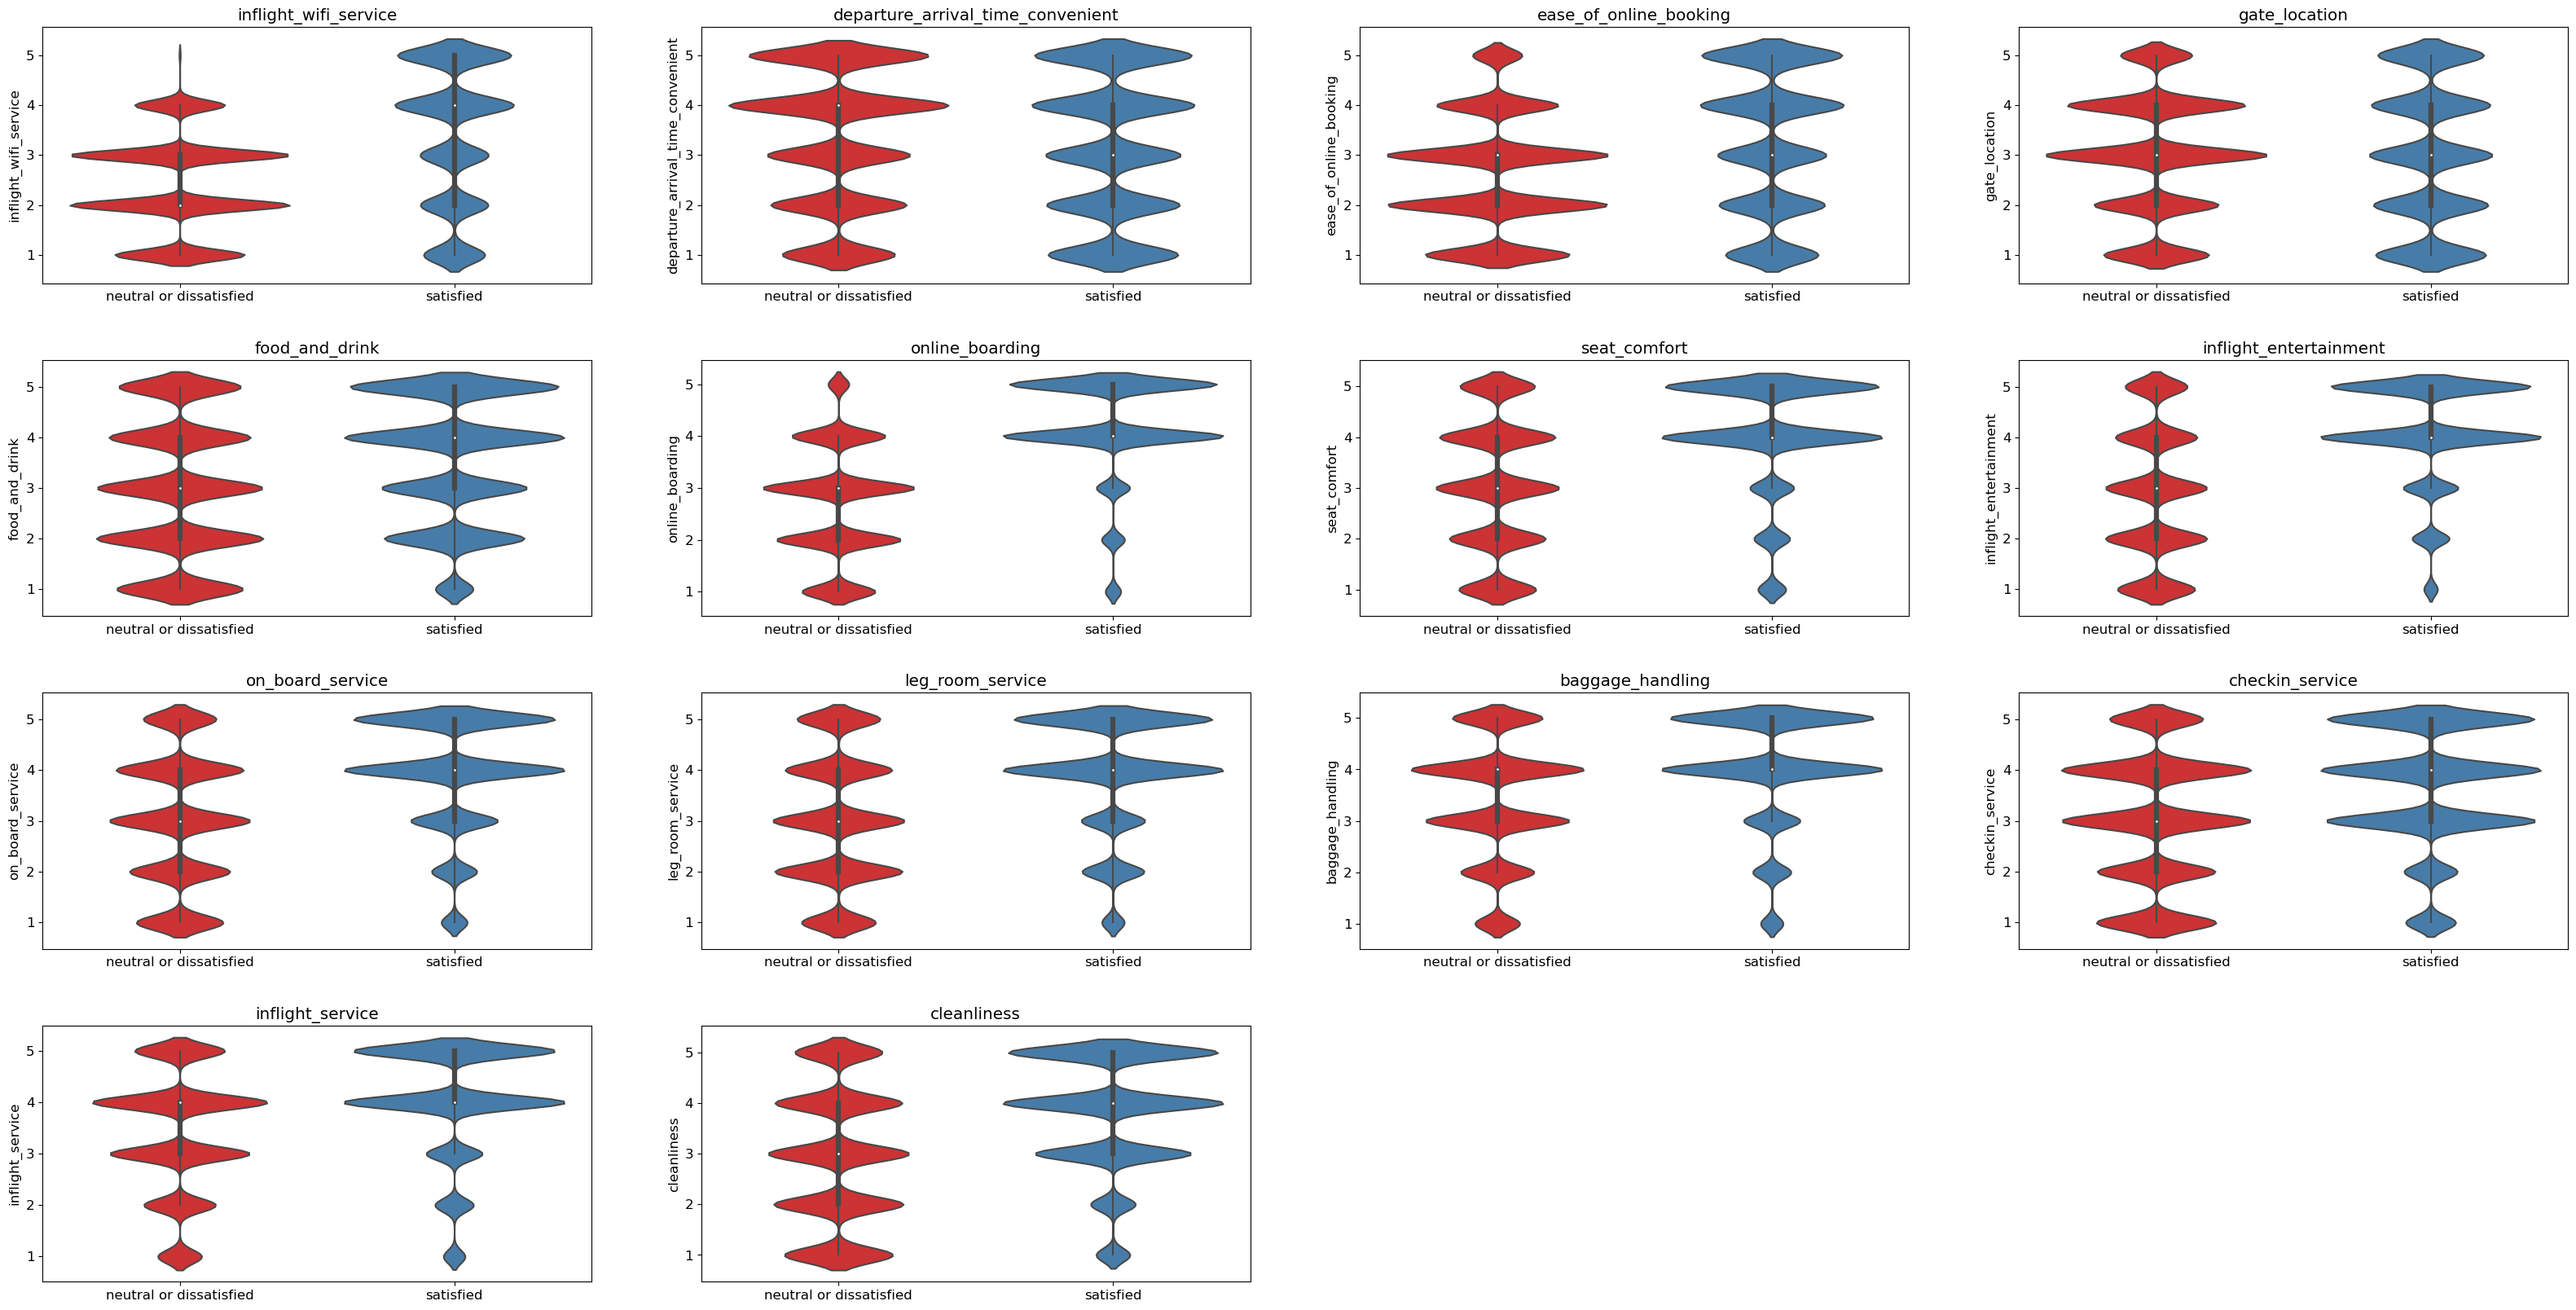

In [30]:
plt.figure(figsize=(40, 20))
plt.subplots_adjust(hspace=0.3)

# Loop through scored columns
for n, score_col in enumerate(score_cols):
    # Add a new subplot iteratively
    ax = plt.subplot(4, 4, n + 1)

    # Filter df and plot scored column on new axis
    sns.violinplot(data = train_cleaned, 
                   x = 'satisfaction', 
                   y =  score_col, 
                   ax = ax,
                   palette = 'Set1')

    # chart formatting
    ax.set_title(score_col),
    ax.set_xlabel("")

**Observation :** Lower scores rating in-flight wi-fi and online booking have a higher impact on passenger dissatisfaction. Meanwhile passenger dissatisfaction has more influence from middle-high scores rating gate location, baggage handling, check-in, and in-flight customer service.

High marks in nearly all categories illustrate a clear impact on customer satisfaction.

### Does age affect rated aspects of airline service?

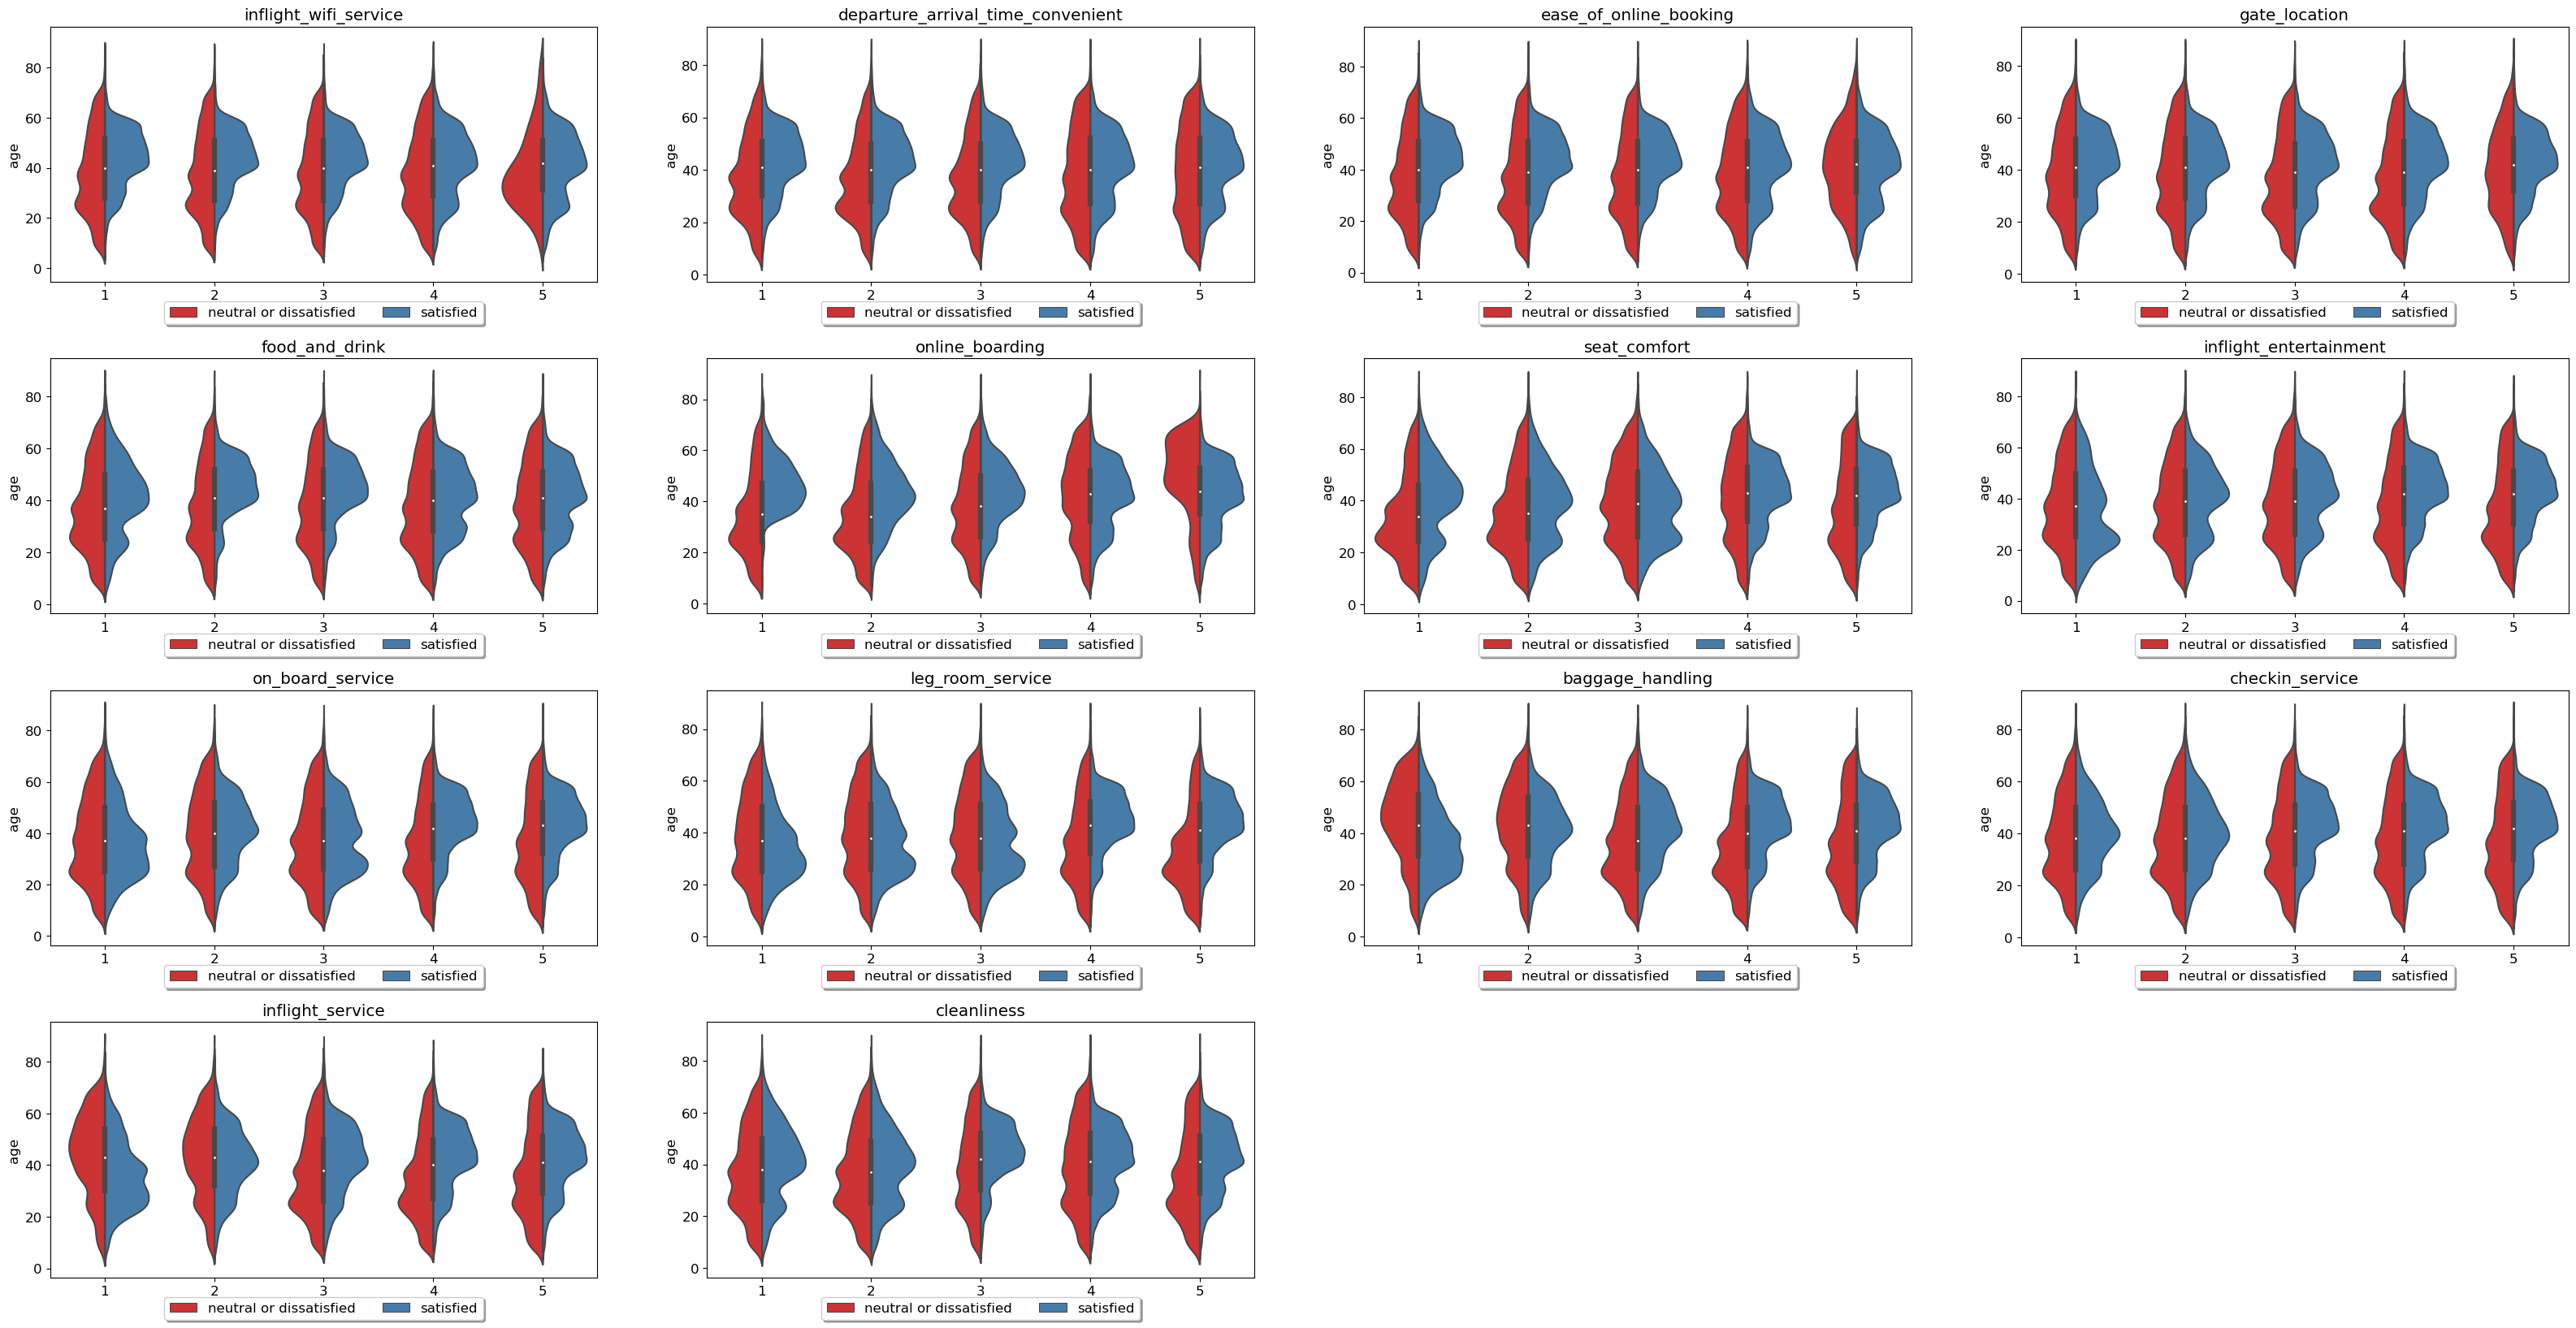

In [31]:
plt.figure(figsize=(40, 20))
plt.subplots_adjust(hspace=0.3)

# Loop through scored columns
for n, score_col in enumerate(score_cols):
    # Add a new subplot iteratively
    ax = plt.subplot(4, 4, n + 1)

    # Filter df and plot scored column on new axis
    sns.violinplot(data = train_cleaned, 
                   x = score_col, 
                   y = 'age', 
                   hue = "satisfaction",
                   split = True,
                   ax = ax,
                   palette = 'Set1')

    # Chart formatting
    ax.set_title(score_col),
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
    ax.set_xlabel("")

**Observations :** For many of these customer service categories, the individual distributions of satisfaction vs dissatisfaction across each rating for customer service directly mirror the bivariate distributions of age vs satisfaction. There is a noticeable peak in the 37-60 age group across most of these distributions.

Certain customer service variables (in-flight customer service, baggage handling, leg room, on-board service quality, and inflight entertainment) have passengers measured as satisfied despite scoring the service column poorly. In the leg room category, there are a large amount of younger travelers dissatisfied despite scoring the column highly.

There are interesting distributions in the online boarding category - where the 40-60 age group is measured as satisfied despite giving the service column the lowest possible score, and dissatisfied despite giving the service column the highest possible score.

I can't see any trends that explicitly illustrate age as a factor with impact on customer satisfaction.

### Does flight distance affect rated aspects of airline service?

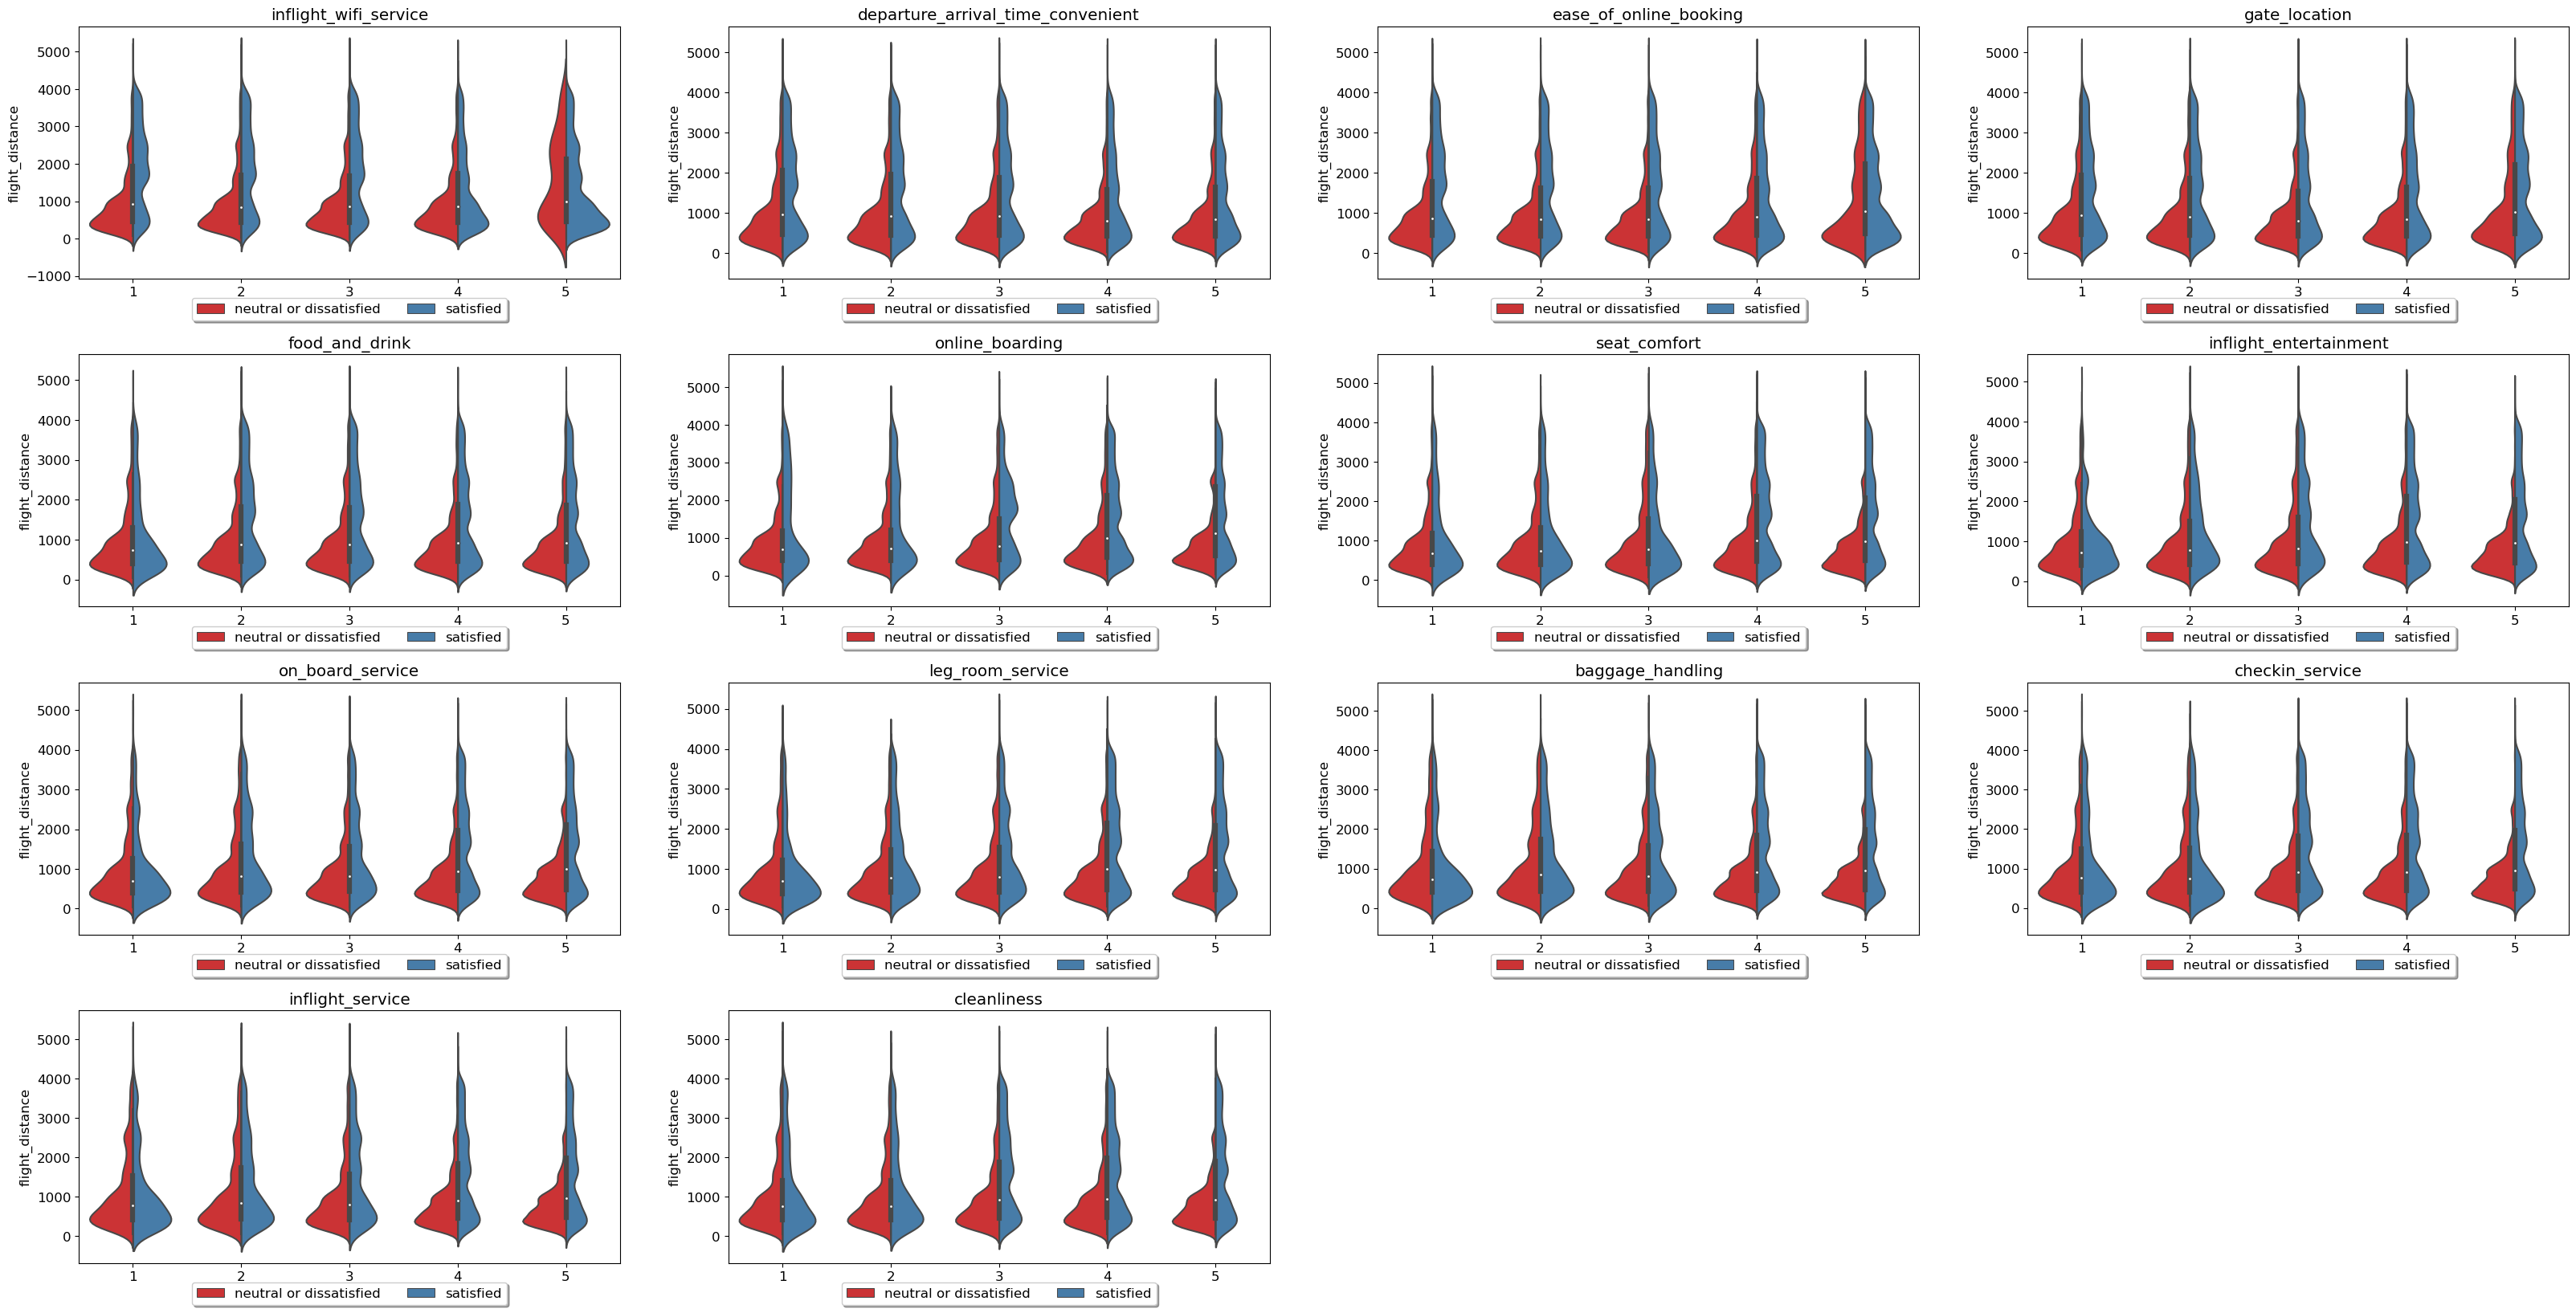

In [32]:
plt.figure(figsize=(40, 20))
plt.subplots_adjust(hspace=0.3)

# Loop through scored columns
for n, score_col in enumerate(score_cols):
    # Add a new subplot iteratively
    ax = plt.subplot(4, 4, n + 1)

    # Filter df and plot scored column on new axis
    sns.violinplot(data = train_cleaned, 
                   x = score_col, 
                   y = 'flight_distance', 
                   hue = "satisfaction",
                   split = True,
                   ax = ax,
                   palette = 'Set1')

    # Chart formatting
    ax.set_title(score_col)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
    ax.set_xlabel("")

**Observations :** While many of these features have equal distributions of satisfied and dissatisfied customers acrossall of the flight distances - there are a few points that suggest  certain features having more of an impact informing satisfaction. 

There is a higher rate of satisfaction for customers who provided the highest mark  for in-flight wi-fi service and online booking ease.

### Does the passenger cabin traveled affect rated aspects of airline service?

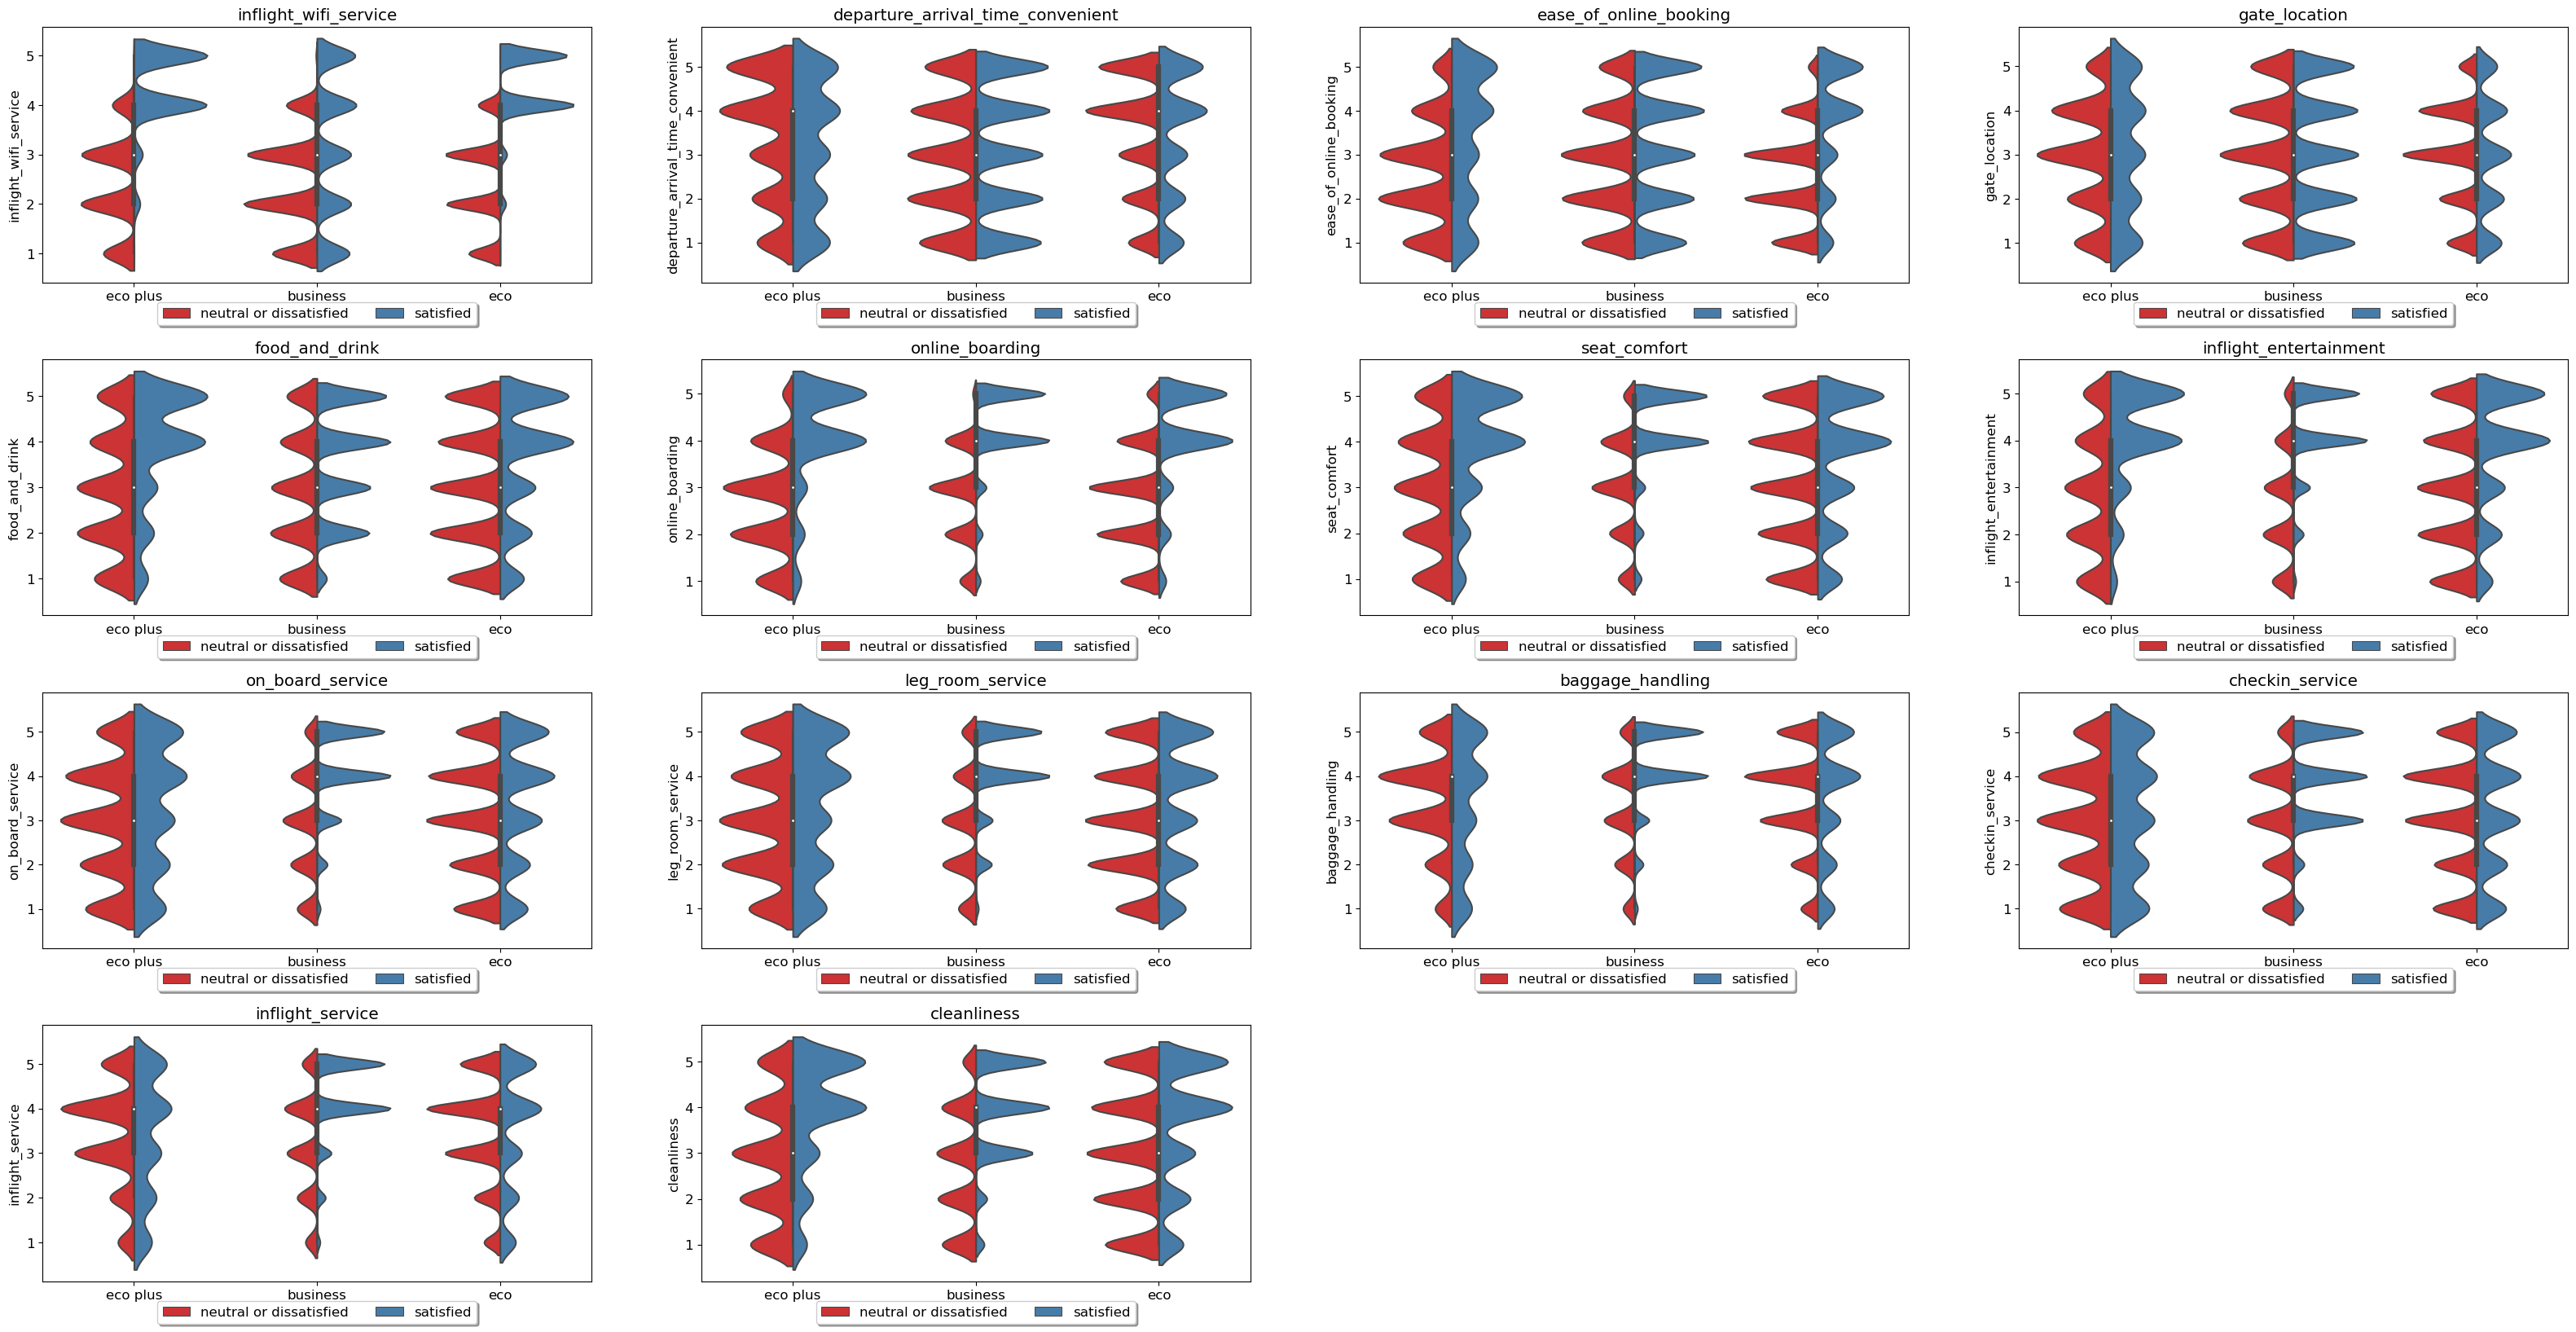

In [33]:
plt.figure(figsize=(40, 20))
plt.subplots_adjust(hspace=0.3)

# Loop through scored columns
for n, score_col in enumerate(score_cols):
    # Add a new subplot iteratively
    ax = plt.subplot(4, 4, n + 1)

    # Filter df and plot scored column on new axis
    sns.violinplot(data = train_cleaned, 
                   x = 'class', 
                   y = score_col, 
                   hue = "satisfaction",
                   split = True,
                   ax = ax,
                   palette = 'Set1')

    # Chart formatting
    ax.set_title(score_col)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
    ax.set_xlabel("")

**Observations :** These discrete distributions tell me that cabin class is going to be a large determinant informing passenger satisfaction. There are clear peaks in satisfaction and dissatisfaction for in-flight wi-fi service, online boarding, seat comfort, in-flight entertainment, on-board customer service, leg room, and in-inflight customer service. 

Online boarding and cabin cleanlilness appear to be an important factor in driving satisfaction regardless of cabin class in which the passenger is traveling. 

On-board service quality, leg room, baggage handling, check-in service, and inflight customer service appear to be important factors informing passenger satisfaction for business class passengers.

An interesting plot is the in-flight wi-fi service column. High ratings appear to have a high impact driving satisfaction for customers flying in economy plus and economy classes. It doesn't appear to have as much of an impact on satisfaction for business class travelers, but mediocre or low ratings appear to have a high impact on dissatisfaction for travelers in this cabin.

### Does the reason for travel affect rated aspects of airline service?

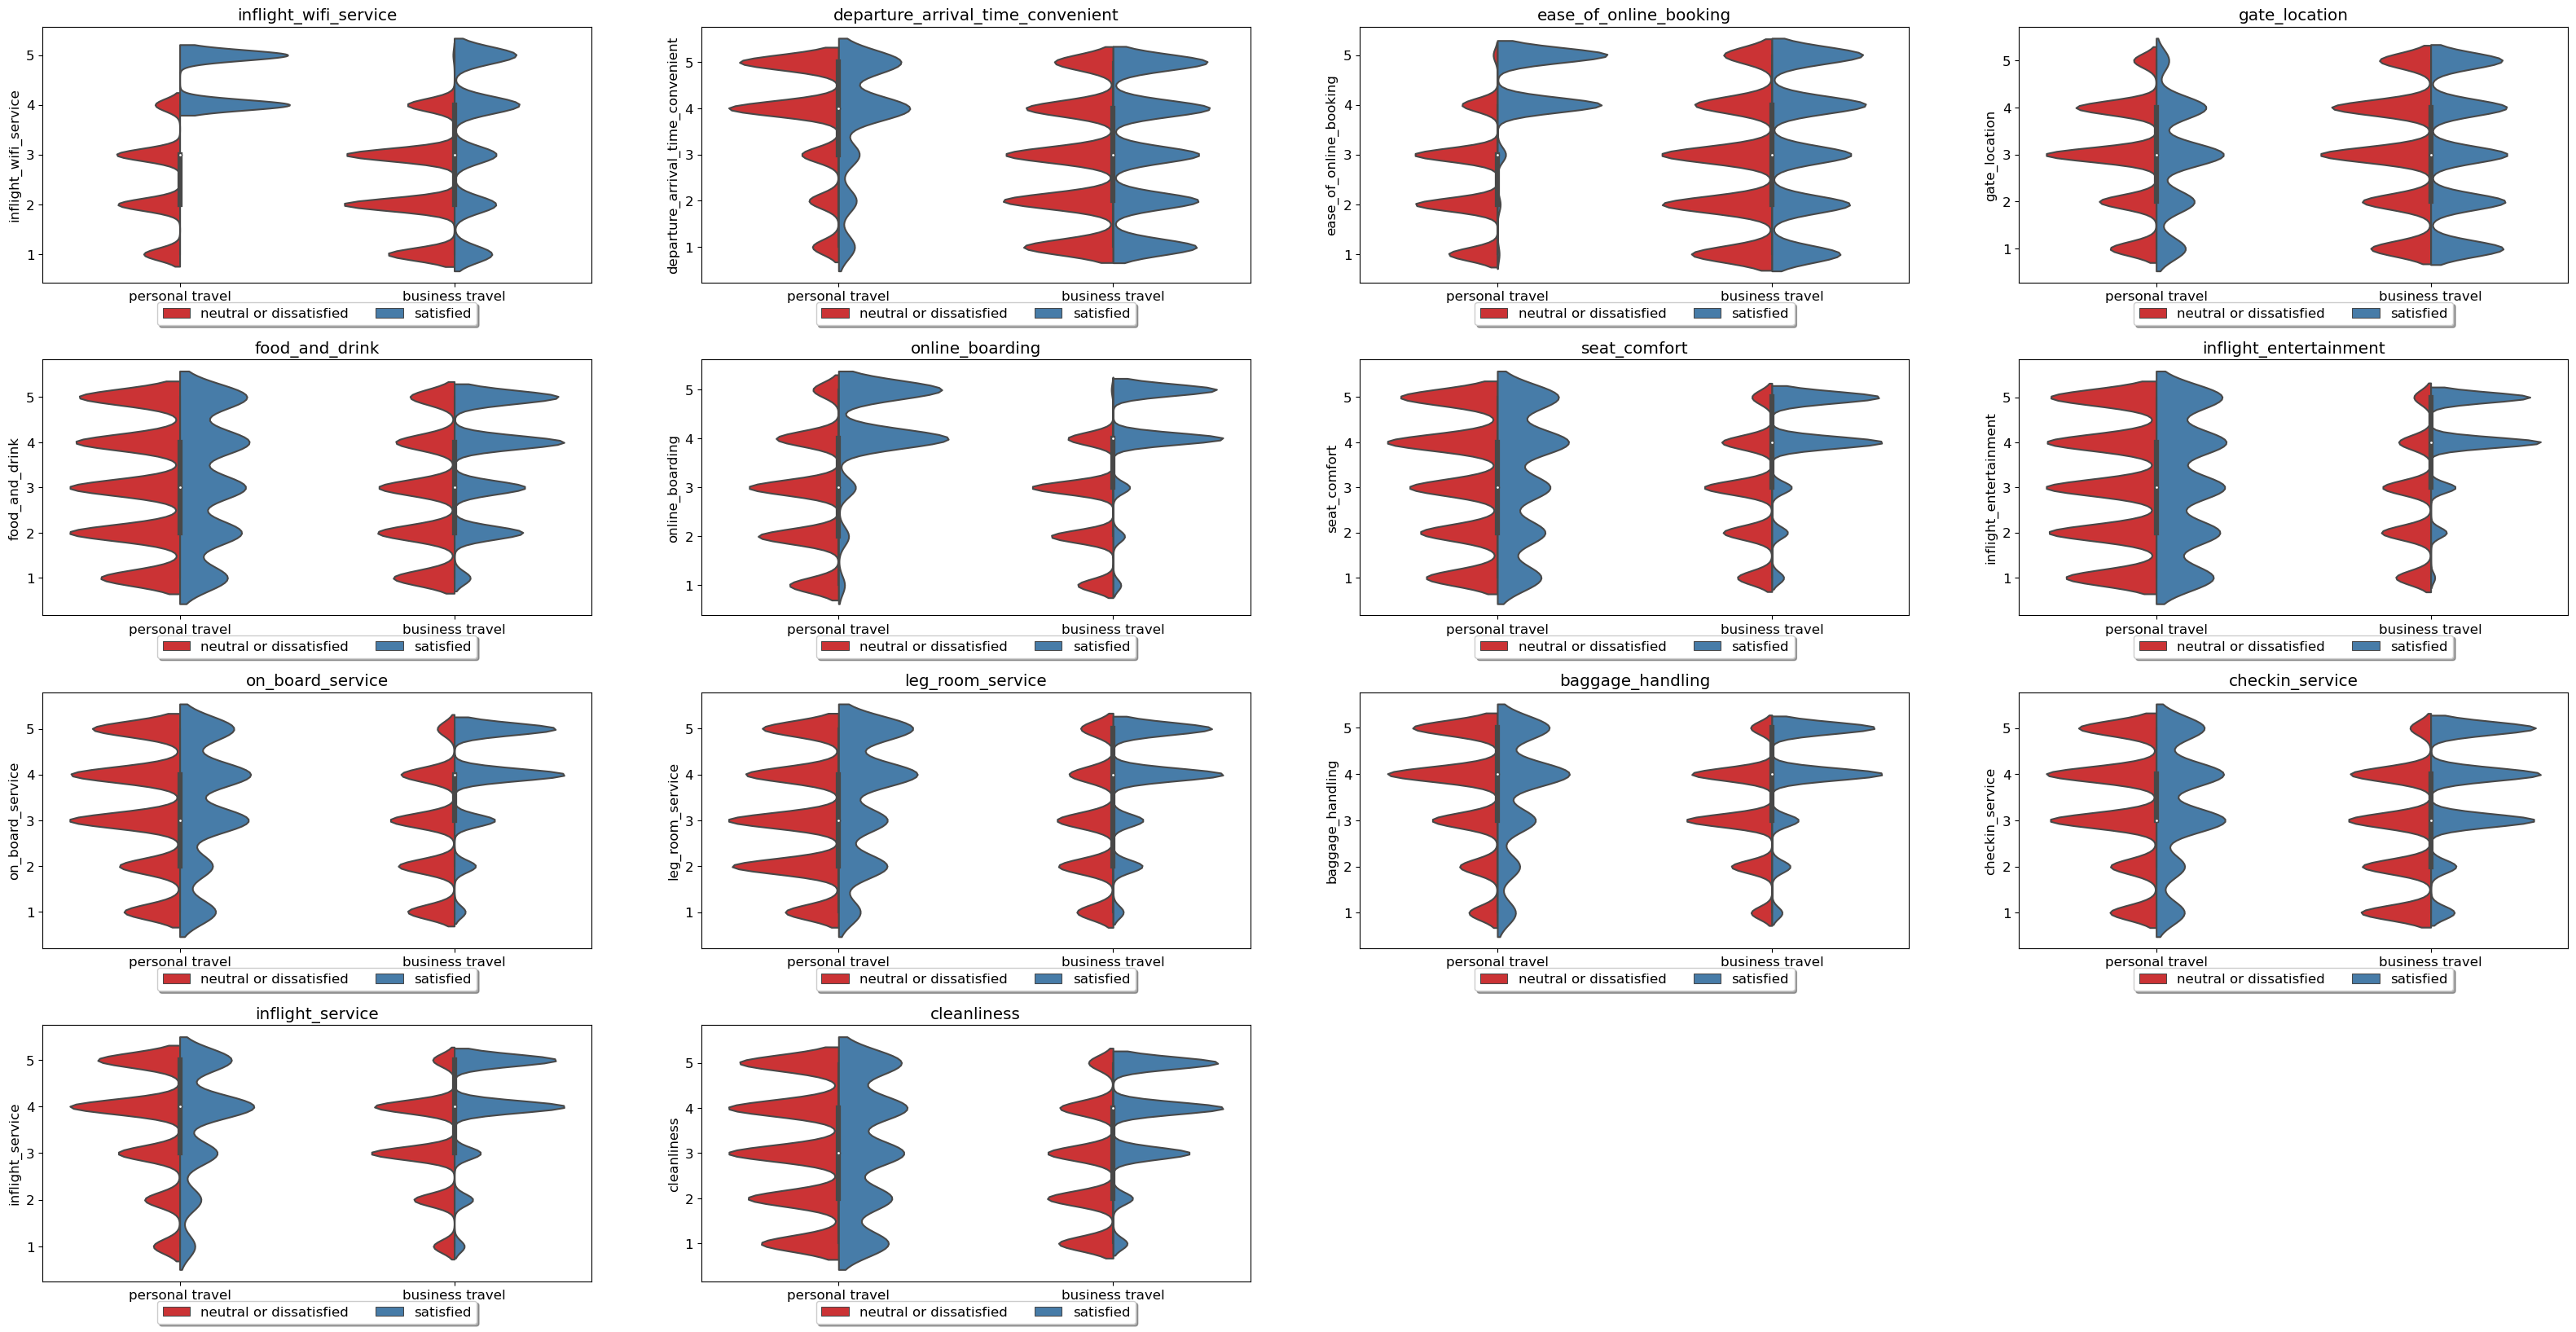

In [34]:
plt.figure(figsize=(40, 20))
plt.subplots_adjust(hspace=0.3)

# Loop through scored columns
for n, score_col in enumerate(score_cols):
    # Add a new subplot iteratively
    ax = plt.subplot(4, 4, n + 1)

    # Filter df and plot scored column on new axis
    sns.violinplot(data = train_cleaned, 
                   x = 'type_of_travel', 
                   y = score_col, 
                   hue = "satisfaction",
                   split = True,
                   ax = ax,
                   palette = 'Set1')

    # Chart formatting
    ax.set_title(score_col)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
    ax.set_xlabel("")

**Observations** : The distributions across these service columns considering the purpose of travel illustrate a high importance in informing customer satisfaction.

Similarly to the trend we observed regarding cabin class, high ratings in boarding process have a high impact on satisfaction. Inflight wi-fi service also has a good impact on customer satisfaction, though we can observe an almost inverse effect when considering the purpose of travel. For personal travelers, high ratings impact satisfaction, though satisfaction seems guaranteed for business travelers regardless of rating. However, low scores for in-flight wi-fi from business travelers impacts dissatisfaction.

We can also observe the same drivers of satisfaction for business travelers (business purpose and business cabin). These being inflight customer service, cleanliness, check-in service, baggage handling, legroom, and on-board service quality.

**[Back to Top](#top)**

## <a name="data-preparation">4. Data Preparation</a>

#### Encoding the dataframe to be ready for model ingestion

In [35]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95704 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             95704 non-null  object 
 1   customer_type                      95704 non-null  object 
 2   age                                95704 non-null  int64  
 3   type_of_travel                     95704 non-null  object 
 4   class                              95704 non-null  object 
 5   flight_distance                    95704 non-null  int64  
 6   inflight_wifi_service              95704 non-null  int64  
 7   departure_arrival_time_convenient  95704 non-null  int64  
 8   ease_of_online_booking             95704 non-null  int64  
 9   gate_location                      95704 non-null  int64  
 10  food_and_drink                     95704 non-null  int64  
 11  online_boarding                    95704 non-null  int64  

In [36]:
train_cleaned.head()

gender      customer_type  age   type_of_travel     class  flight_distance  \
0    male     loyal customer   13  personal travel  eco plus              460   
1    male  disloyal customer   25  business travel  business              235   
2  female     loyal customer   26  business travel  business             1142   
3  female     loyal customer   25  business travel  business              562   
4    male     loyal customer   61  business travel  business              214   

   inflight_wifi_service  departure_arrival_time_convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   ease_of_online_booking  gate_location  ...  leg_room_service  \
0                       3              1  ...                 3   
1                       3              3  ...                 5   
2                       2              2  ...                 3   
3                       5              5  ...                 5   
4                       3              3  ...                 4   

   baggage_handling  checkin_service  inflight_service  cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   departure_delay_in_minutes  arrival_delay_in_minutes  \
0                        25.0                      18.0   
1                         1.0                       6.0   
2                         0.0                       0.0   
3                        11.0                       9.0   
4                         0.0                       0.0   

              satisfaction  total_delay_time  was_flight_delayed  
0  neutral or dissatisfied              43.0                 yes  
1  neutral or dissatisfied               7.0                 yes  
2                satisfied               0.0                  no  
3  neutral or dissatisfied              20.0                 yes  
4                satisfied               0.0                  no  

[5 rows x 25 columns]

In [37]:
from sklearn.preprocessing import OrdinalEncoder

In [38]:
def encode_data(orig_df):
    '''
    Encodes remaining categorical variables of data frame to be ready for model ingestion
    
    Inputs:
       Dataframe
       
    Manipulations:
        Encoding of categorical variables.    
    
    Return: 
        Encoded Column Values
    '''
    
    '''
        Ordinal encode of scored rating columns.
    '''
    
    df = orig_df.copy()
    
    encoder = OrdinalEncoder()
    
    for j in score_cols:
        df[j] = encoder.fit_transform(df[[j]]) 
    
    '''
        Replacement of binary categories.
    '''
    df.was_flight_delayed.replace({'no': 0, 'yes' : 1}, inplace = True)
    df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
    df.customer_type.replace({'disloyal customer': 0, 'loyal customer': 1}, inplace = True)
    df.type_of_travel.replace({'personal travel': 0, 'business travel': 1}, inplace = True)
    df.gender.replace({'male': 0, 'female' : 1}, inplace = True)
    
    encoded_df = pd.get_dummies(df, columns = ['class'])
    
    return encoded_df

In [39]:
# Applying encoding to training dataset
train_encoded = encode_data(train_cleaned)

In [40]:
train_encoded.cleanliness.value_counts()

cleanliness
3.0    25294
2.0    22634
4.0    20928
1.0    14727
0.0    12121
Name: count, dtype: int64

In [41]:
train_encoded.head()

gender  customer_type  age  type_of_travel  flight_distance  \
0       0              1   13               0              460   
1       0              0   25               1              235   
2       1              1   26               1             1142   
3       1              1   25               1              562   
4       0              1   61               1              214   

   inflight_wifi_service  departure_arrival_time_convenient  \
0                    2.0                                3.0   
1                    2.0                                1.0   
2                    1.0                                1.0   
3                    1.0                                4.0   
4                    2.0                                2.0   

   ease_of_online_booking  gate_location  food_and_drink  ...  \
0                     2.0            0.0             4.0  ...   
1                     2.0            2.0             0.0  ...   
2                     1.0            1.0             4.0  ...   
3                     4.0            4.0             1.0  ...   
4                     2.0            2.0             3.0  ...   

   inflight_service  cleanliness  departure_delay_in_minutes  \
0               4.0          4.0                        25.0   
1               3.0          0.0                         1.0   
2               3.0          4.0                         0.0   
3               3.0          1.0                        11.0   
4               2.0          2.0                         0.0   

   arrival_delay_in_minutes  satisfaction  total_delay_time  \
0                      18.0             0              43.0   
1                       6.0             0               7.0   
2                       0.0             1               0.0   
3                       9.0             0              20.0   
4                       0.0             1               0.0   

   was_flight_delayed  class_business  class_eco  class_eco plus  
0                   1           False      False            True  
1                   1            True      False           False  
2                   0            True      False           False  
3                   1            True      False           False  
4                   0            True      False           False  

[5 rows x 27 columns]

In [42]:
train_encoded.satisfaction.value_counts()

satisfaction
0    54947
1    40757
Name: count, dtype: int64

In [43]:
type(train_encoded)

pandas.core.frame.DataFrame

In [44]:
train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95704 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             95704 non-null  int64  
 1   customer_type                      95704 non-null  int64  
 2   age                                95704 non-null  int64  
 3   type_of_travel                     95704 non-null  int64  
 4   flight_distance                    95704 non-null  int64  
 5   inflight_wifi_service              95704 non-null  float64
 6   departure_arrival_time_convenient  95704 non-null  float64
 7   ease_of_online_booking             95704 non-null  float64
 8   gate_location                      95704 non-null  float64
 9   food_and_drink                     95704 non-null  float64
 10  online_boarding                    95704 non-null  float64
 11  seat_comfort                       95704 non-null  float64

In [45]:
# Applying encoding to test dataset
test_encoded = encode_data(test_cleaned)

#### Correlation of all features against target variable

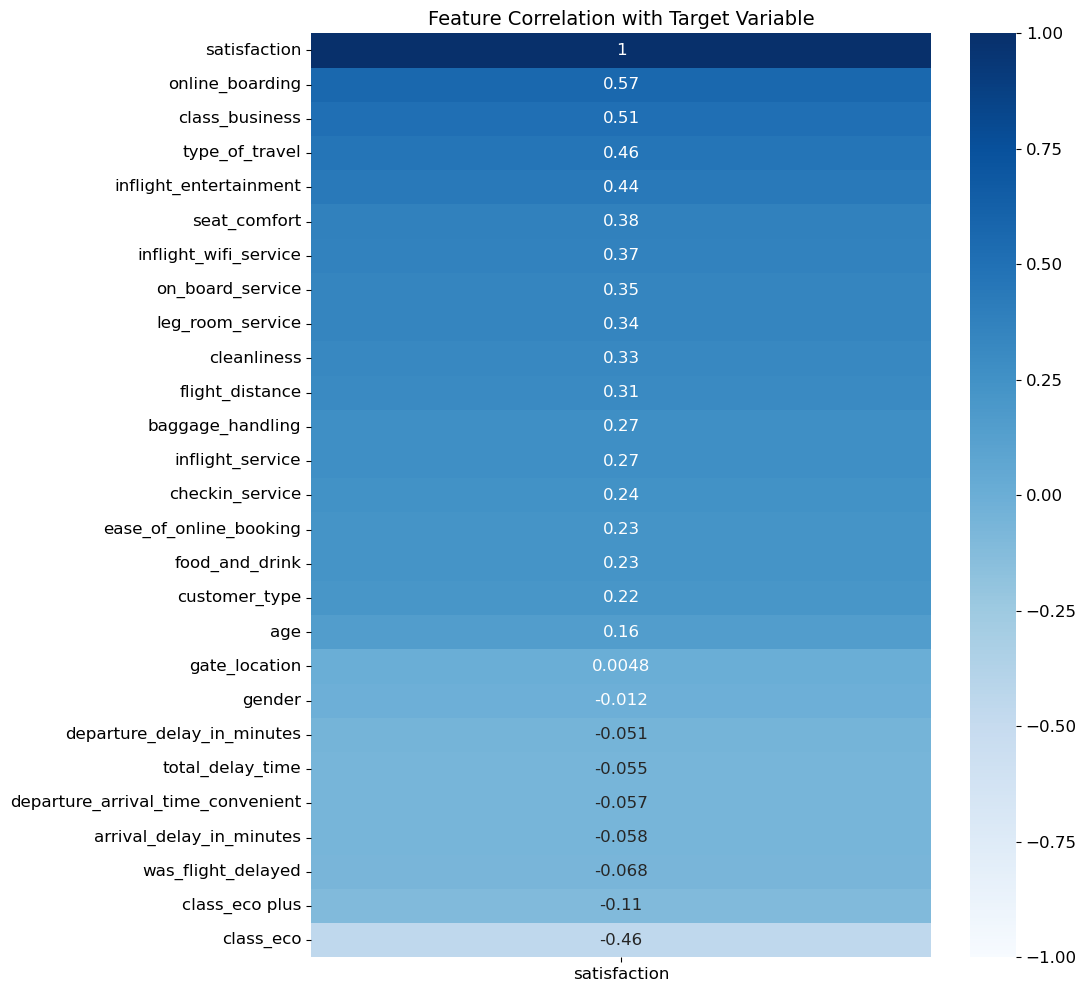

In [46]:
train_corr = train_encoded.corr()[['satisfaction']]
train_corr = train_corr

plt.figure(figsize=(10, 12))

heatmap = sns.heatmap(train_corr.sort_values(by='satisfaction', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='Blues')

heatmap.set_title('Feature Correlation with Target Variable', fontdict={'fontsize':14});

#### Feature Selection

In [47]:
# Pre-processing and scaling dataset for feature selection
from sklearn import preprocessing

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train_encoded)
 
train_scaled = pd.DataFrame(r_scaler.transform(train_encoded), columns = train_encoded.columns)
train_scaled.head()

gender  customer_type       age  type_of_travel  flight_distance  \
0     0.0            1.0  0.076923             0.0         0.086632   
1     0.0            0.0  0.230769             1.0         0.041195   
2     1.0            1.0  0.243590             1.0         0.224354   
3     1.0            1.0  0.230769             1.0         0.107229   
4     0.0            1.0  0.692308             1.0         0.036955   

   inflight_wifi_service  departure_arrival_time_convenient  \
0                   0.50                               0.75   
1                   0.50                               0.25   
2                   0.25                               0.25   
3                   0.25                               1.00   
4                   0.50                               0.50   

   ease_of_online_booking  gate_location  food_and_drink  ...  \
0                    0.50           0.00            1.00  ...   
1                    0.50           0.50            0.00  ...   
2                    0.25           0.25            1.00  ...   
3                    1.00           1.00            0.25  ...   
4                    0.50           0.50            0.75  ...   

   inflight_service  cleanliness  departure_delay_in_minutes  \
0              1.00         1.00                    0.015704   
1              0.75         0.00                    0.000628   
2              0.75         1.00                    0.000000   
3              0.75         0.25                    0.006910   
4              0.50         0.50                    0.000000   

   arrival_delay_in_minutes  satisfaction  total_delay_time  \
0                  0.011364           0.0          0.013539   
1                  0.003788           0.0          0.002204   
2                  0.000000           1.0          0.000000   
3                  0.005682           0.0          0.006297   
4                  0.000000           1.0          0.000000   

   was_flight_delayed  class_business  class_eco  class_eco plus  
0                 1.0             0.0        0.0             1.0  
1                 1.0             1.0        0.0             0.0  
2                 0.0             1.0        0.0             0.0  
3                 1.0             1.0        0.0             0.0  
4                 0.0             1.0        0.0             0.0  

[5 rows x 27 columns]

In [48]:
# Feature selection, applying Select K Best and Chi2 to output the 15 most important features
from sklearn.feature_selection import SelectKBest, chi2

X = train_scaled.loc[:,train_scaled.columns!='satisfaction']
y = train_scaled[['satisfaction']]

selector = SelectKBest(chi2, k = 10)
selector.fit(X, y)
X_new = selector.transform(X)

features = (X.columns[selector.get_support(indices=True)])
features

Index(['type_of_travel', 'inflight_wifi_service', 'online_boarding',
       'seat_comfort', 'inflight_entertainment', 'on_board_service',
       'leg_room_service', 'cleanliness', 'class_business', 'class_eco'],
      dtype='object')

In [49]:
selector.pvalues_

array([6.69798296e-003, 6.51597103e-161, 2.74981007e-046, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 2.62274871e-016, 2.67143169e-249,
       5.00768922e-001, 2.65703013e-214, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.17553644e-202,
       4.62662048e-217, 7.43319643e-194, 0.00000000e+000, 9.00744872e-005,
       8.65788663e-006, 2.87418958e-005, 1.36828268e-045, 0.00000000e+000,
       0.00000000e+000, 4.45255856e-231])

**Observations :** With Chi-Square p-value as the selection criteria, many of the features picked are the different scored aspects of a customer experience, in addition to the reason for travel and the cabin class in which they are travelling. 

## <a name="modelling">5. Modelling</a>

#### Modelling library imports

In [50]:
import sklearn
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
import xgboost
from xgboost import XGBClassifier

#### Model architecture

In [51]:
# Features as selected from feature importance
features = features

# Specifying target variable
target = ['satisfaction']

# Splitting into train and test
X_train = train_encoded[features].to_numpy()
X_test = test_encoded[features]
y_train = train_encoded[target].to_numpy()
y_test = test_encoded[target]

In [52]:
X_test.shape

(23863, 10)

#### Model Activation Function

In [53]:
# Time scores and metrics imports
import time
#from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

In [59]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix



In [60]:
# Model activation and result plot function
def get_model_metrics(model, X_train, X_test, y_train, y_test):
   
    '''
    Model activation function, takes in model as a parameter and returns metrics as specified.
    
    Inputs: 
        model,  X_train, y_train, X_test, y_test
    
    Output: 
        Model output metrics, confusion matrix, ROC AUC curve
    '''
    
    # Mark of current time when model began running
    t0 = time.time()
    
    # Fit the model on the training data and run predictions on test data
    model.fit(X_train,  y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:,1]
    # Obtain training accuracy as a comparative metric using Sklearn's metrics package
    train_score = model.score(X_train, y_train)
    # Obtain testing accuracy as a comparative metric using Sklearn's metrics package
    accuracy = accuracy_score(y_test, y_pred)
    # Obtain precision from predictions using Sklearn's metrics package
    precision = precision_score(y_test, y_pred)
    # Obtain recall from predictions using Sklearn's metrics package
    recall = recall_score(y_test, y_pred)
    # Obtain f1 from predictions using Sklearn's metrics package
    f1 = f1_score(y_test, y_pred)
    # Obtain ROC score from predictions using Sklearn's metrics package
    roc = roc_auc_score(y_test, y_pred_proba)

   
    # Outputting the metrics of the model performance
    print("Accuracy on Training = {}".format(train_score))
    print("Accuracy on Test = {} • Precision = {}".format(accuracy, precision))
    print("Recall = {}".format(recall))
    print("F1 = {} • ROC Area under Curve = {}".format(f1, roc))

    cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    cm_display.plot()
    
    # Plotting the ROC AUC curve of the model 
    roc_display = RocCurveDisplay(fpr=[0, 1], tpr=[0, 1], roc_auc=roc)
    roc_display.plot()  
    
    
    return model, train_score, accuracy, precision, recall, f1, roc

## <a name="first-models">5.1 Model Candidate Pipelines</a>

### Logistic Regression Model
##### Parameters for Logistic Regression Model

In [61]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

##### Performing randomized search to obtain optimal model parameters

In [62]:
%%time
clf = LogisticRegression()

params = {'n_jobs': [0, 5, 10, 15, 20]}

rscv = RandomizedSearchCV(estimator = clf,
                         param_distributions = params,
                         scoring = 'f1',
                         n_iter = 10,
                         verbose = 1)
rscv.fit(X_train, y_train)
rscv.predict(X_test)

# Parameter object to be passed through to function activation
params = rscv.best_params_

print("Best parameters:", params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'n_jobs': 5}
CPU times: total: 13.2 s
Wall time: 29.4 s


##### Running model pipeline and obtaining performance metrics

Accuracy on Training = 0.8776644654350916
Accuracy on Test = 0.8738633030214139 • Precision = 0.8552979160551805
Recall = 0.8509685583568578
F1 = 0.8531277447057676 • ROC Area under Curve = 0.9450839720945631


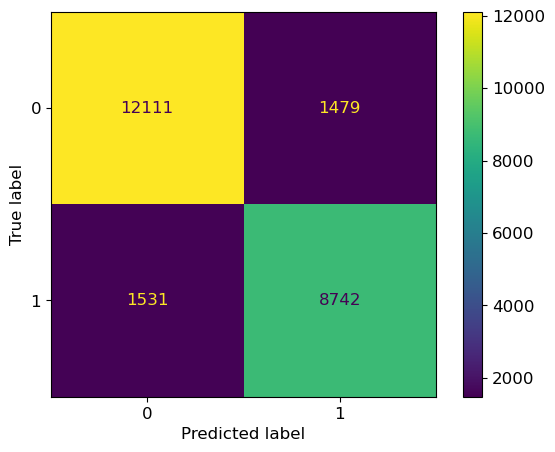

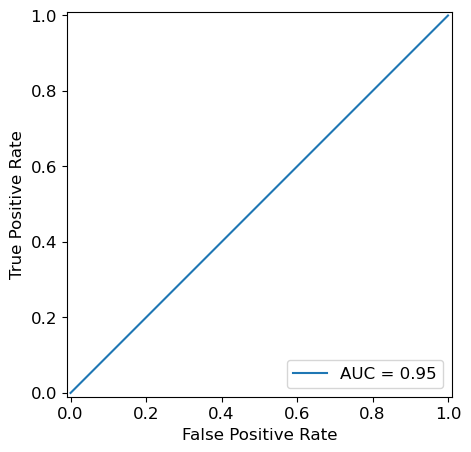

In [64]:
model_lr = LogisticRegression(**params)
model_lr, train_lr, accuracy_lr, precision_lr, recall_lr, f1_lr, roc_lr = get_model_metrics(model_lr,
                                                                                                   X_train,
                                                                                                   X_test,
                                                                                                   y_train,
                                                                                                   y_test)

### Random Forest Classifier
##### Parameters for Random Forest

In [65]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### Performing randomized search to obtain optimal model parameters

In [66]:
%%time
clf = RandomForestClassifier()

params = { 'max_depth': [5, 10, 15, 20, 25, 30],
           'max_leaf_nodes': [10, 20, 30, 40, 50],
           'min_samples_split': [1, 2, 3, 4, 5]}

rscv = RandomizedSearchCV(estimator = clf,
                         param_distributions = params,
                         scoring = 'f1',
                         n_iter = 10,
                         verbose = 1)
rscv.fit(X_train, y_train)
rscv.predict(X_test)

# Parameter object to be passed through to function activation
params = rscv.best_params_

print("Best parameters:", params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'min_samples_split': 3, 'max_leaf_nodes': 50, 'max_depth': 25}
CPU times: total: 1min 29s
Wall time: 1min 29s


##### Running model pipeline and obtaining performance metrics

Accuracy on Training = 0.9306821031513834
Accuracy on Test = 0.9321124753802958 • Precision = 0.9265503302770384
Recall = 0.9148252701255719
F1 = 0.9206504702194357 • ROC Area under Curve = 0.9776307611621425


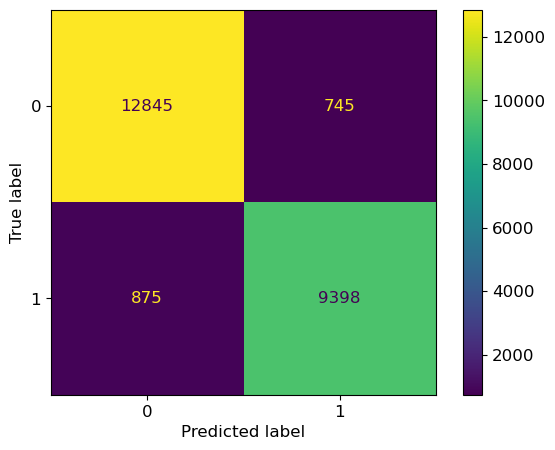

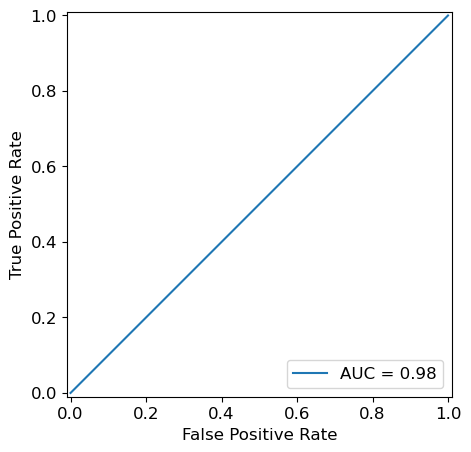

In [67]:
model_rf = RandomForestClassifier(**params)
model_rf, train_rf, accuracy_rf, precision_rf, recall_rf, f1_rf, roc_rf= get_model_metrics(model_rf,
                                                                                                   X_train,
                                                                                                   X_test,
                                                                                                   y_train,
                                                                                                   y_test)

### Adaptive Boosting Classifier (AdaBoost)
##### Parameters for AdaBoost Classifier

In [68]:
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

##### Performing randomized search to obtain optimal model parameters

In [69]:
%%time
clf = AdaBoostClassifier()

params = { 'n_estimators': [25, 50, 75, 100, 125, 150],
           'learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0]}

rscv = RandomizedSearchCV(estimator = clf,
                         param_distributions = params,
                         scoring = 'f1',
                         n_iter = 10,
                         verbose = 1)
rscv.fit(X_train, y_train)
rscv.predict(X_test)

# Parameter object to be passed through to function activation
params = rscv.best_params_

print("Best parameters:", params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 150, 'learning_rate': 1.0}
CPU times: total: 6min 20s
Wall time: 6min 22s


##### Running model pipeline and obtaining performance metrics

Accuracy on Training = 0.9076005182646494
Accuracy on Test = 0.9065079830700247 • Precision = 0.8997017892644135
Recall = 0.8810474058210844
F1 = 0.8902768897850785 • ROC Area under Curve = 0.9626985897220738


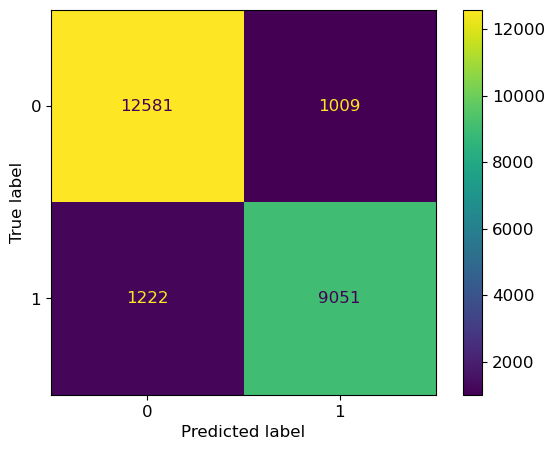

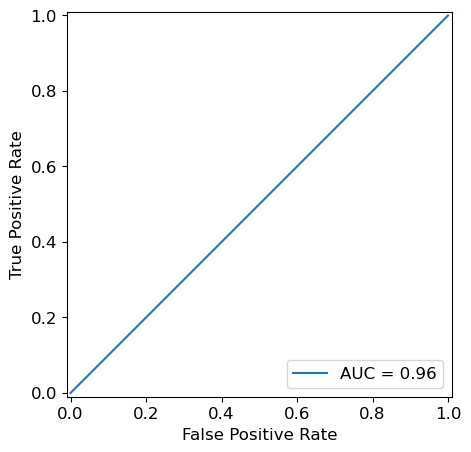

In [70]:
model_ada = AdaBoostClassifier(**params)

# Saving output metrics
model_ada, accuracy_ada, train_ada, precision_ada, recall_ada, f1_ada, roc_ada = get_model_metrics(model_ada,
                                                                                                           X_train,
                                                                                                           X_test,
                                                                                                           y_train,
                                                                                                           y_test)

### Categorical Naive Bayes 
##### Parameters for Categorical Naive Bayes

In [71]:
CategoricalNB().get_params()

{'alpha': 1.0,
 'class_prior': None,
 'fit_prior': True,
 'force_alpha': True,
 'min_categories': None}

##### Performing randomized search to obtain optimal model parameters

In [72]:
%%time
clf = CategoricalNB()

params = { 'alpha': [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
           'min_categories': [6, 8, 10]}

rscv = RandomizedSearchCV(estimator = clf,
                         param_distributions = params,
                         scoring = 'f1',
                         n_iter = 10,
                         verbose = 1)
rscv.fit(X_train, y_train)
rscv.predict(X_test)

# Parameter object to be passed through to function activation
params = rscv.best_params_

print("Best parameters:", params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'min_categories': 8, 'alpha': 0.001}
CPU times: total: 4.45 s
Wall time: 4.46 s


##### Running model pipeline and obtaining performance metrics

Accuracy on Training = 0.8942572933210733
Accuracy on Test = 0.890122784226627 • Precision = 0.8703649917707426
Recall = 0.8751095103669814
F1 = 0.8727308028346763 • ROC Area under Curve = 0.9490493379166705


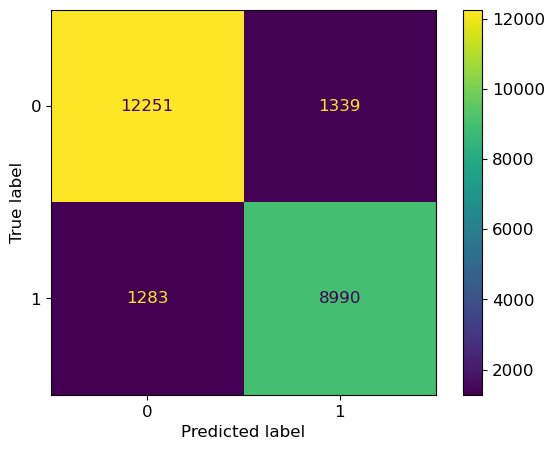

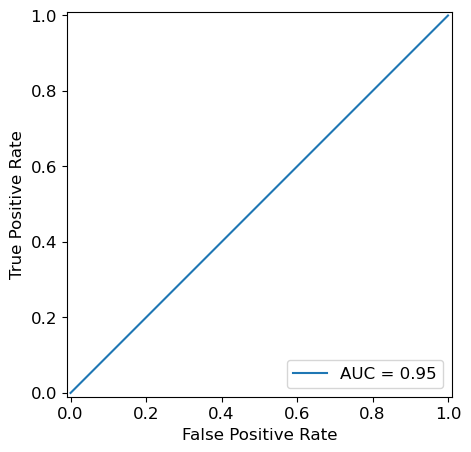

In [73]:
model_cnb = CategoricalNB(**params)

# Saving Output Metrics
model_cnb, accuracy_cnb, train_cnb, precision_cnb, recall_cnb, f1_cnb, roc_cnb = get_model_metrics(model_cnb, 
                                                                                                           X_train, 
                                                                                                           X_test,
                                                                                                           y_train, 
                                                                                                           y_test)

### Extreme Gradient Boosting Classifier (XGBoost)
##### Parameters for XGBoost Classifier

In [74]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

##### Performing randomized search to obtain optimal model parameters

In [75]:
%%time
clf = XGBClassifier()

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'n_estimators': [100, 500, 1000]}

rscv = RandomizedSearchCV(estimator = clf,
                         param_distributions = params,
                         scoring = 'f1',
                         n_iter = 10,
                         verbose = 1)
rscv.fit(X_train, y_train)
rscv.predict(X_test)

# Parameter object to be passed through to function activation
params = rscv.best_params_

print("Best parameters:", params)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.1}
CPU times: total: 16min 1s
Wall time: 2min 21s


##### Running model pipeline and obtaining performance metrics

Accuracy on Training = 0.9550071052411603
Accuracy on Test = 0.9416251100029334 • Precision = 0.9405636038896606
Recall = 0.9227100165482333
F1 = 0.9315512751216156 • ROC Area under Curve = 0.9869252160678669


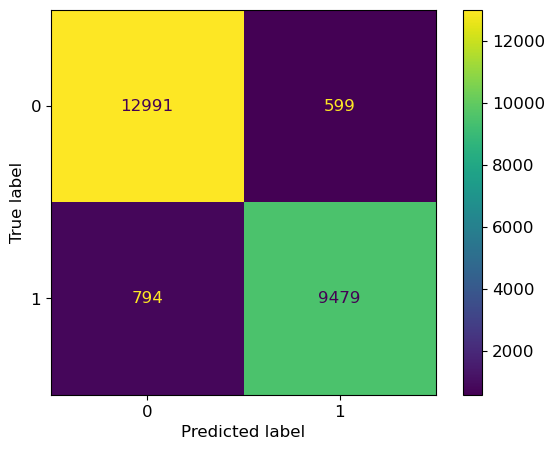

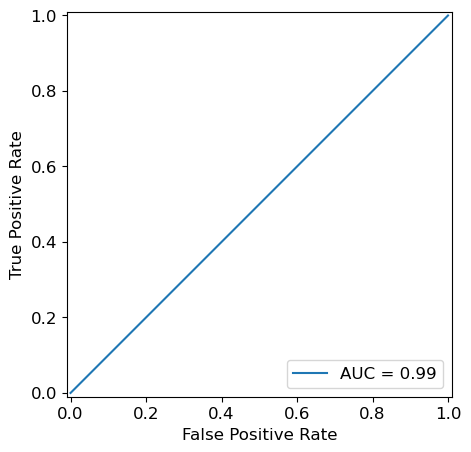

In [76]:
model_xgb = XGBClassifier(**params)

# Saving Output Metrics
model_xgb, accuracy_xgb, train_xgb, precision_xgb, recall_xgb, f1_xgb, roc_xgb= get_model_metrics(model_xgb,
                                                                                                           X_train,
                                                                                                           X_test,
                                                                                                           y_train,
                                                                                                           y_test)

In [77]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

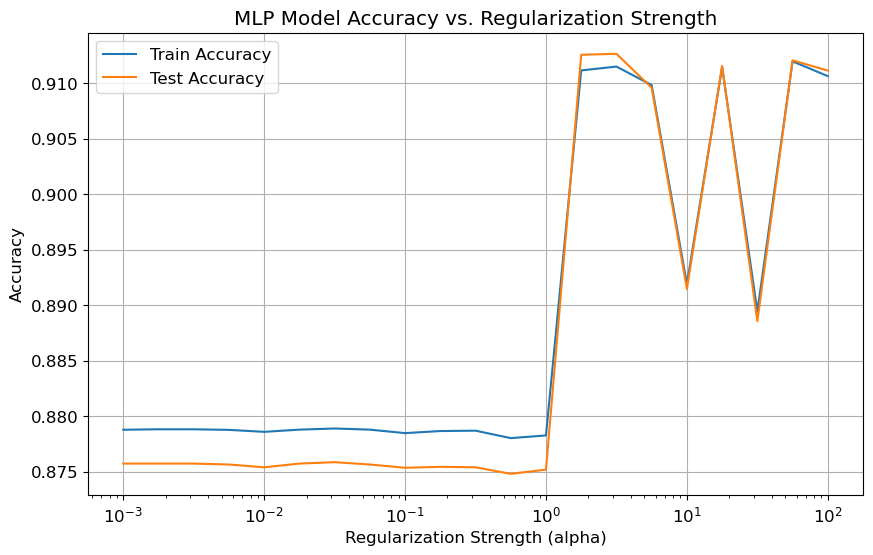

In [96]:
from sklearn.metrics import accuracy_score

# Initialize lists to store errors and accuracies
test_err = []
train_acc = []
test_acc = []

for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha=alpha, 
                              hidden_layer_sizes=2,
                              solver='lbfgs', 
                              max_iter=1000, 
                              activation='logistic',
                              random_state=42)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(alpha_arr, train_acc, label='Train Accuracy')
plt.plot(alpha_arr, test_acc, label='Test Accuracy')
plt.title('MLP Model Accuracy vs. Regularization Strength')
plt.xlabel('Regularization Strength (alpha)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

## <a name="output-comparison">5.2 Comparing output performance of the model pipelines</a>

In [114]:
# Collecting model data
training_scores = [train_lr, train_rf, train_ada, train_cnb, train_xgb]
accuracy = [accuracy_lr, accuracy_rf, accuracy_ada, accuracy_cnb, accuracy_xgb]
precision = [precision_lr, precision_rf, precision_ada, precision_cnb, precision_xgb]
recall = [recall_lr, recall_rf, recall_ada, recall_cnb, recall_xgb]
f1_scores = [f1_lr, f1_rf, f1_ada, f1_cnb, f1_xgb]
roc_scores = [roc_lr, roc_rf, roc_ada, roc_cnb, roc_xgb]


model_data = {'Model': ['Logistic Regression', 'Random Forest', 'Adaptive Boost',
                       'Categorical Bayes', 'Extreme Gradient Boost'],
            'Accuracy on Training' : training_scores,
            'Accuracy on Test' : accuracy,
            'Precision' : precision,
            'Recall' : recall,
            'F1' : f1_scores,
            'ROC AUC Score' : roc_scores}

model_data = pd.DataFrame(model_data)
model_data

Model  Accuracy on Training  Accuracy on Test  Precision  \
0     Logistic Regression              0.877664          0.873863   0.855298   
1           Random Forest              0.930682          0.932112   0.926550   
2          Adaptive Boost              0.906508          0.907601   0.899702   
3       Categorical Bayes              0.890123          0.894257   0.870365   
4  Extreme Gradient Boost              0.941625          0.955007   0.940564   

     Recall        F1  ROC AUC Score  
0  0.850969  0.853128       0.945084  
1  0.914825  0.920650       0.977631  
2  0.881047  0.890277       0.962699  
3  0.875110  0.872731       0.949049  
4  0.922710  0.931551       0.986925

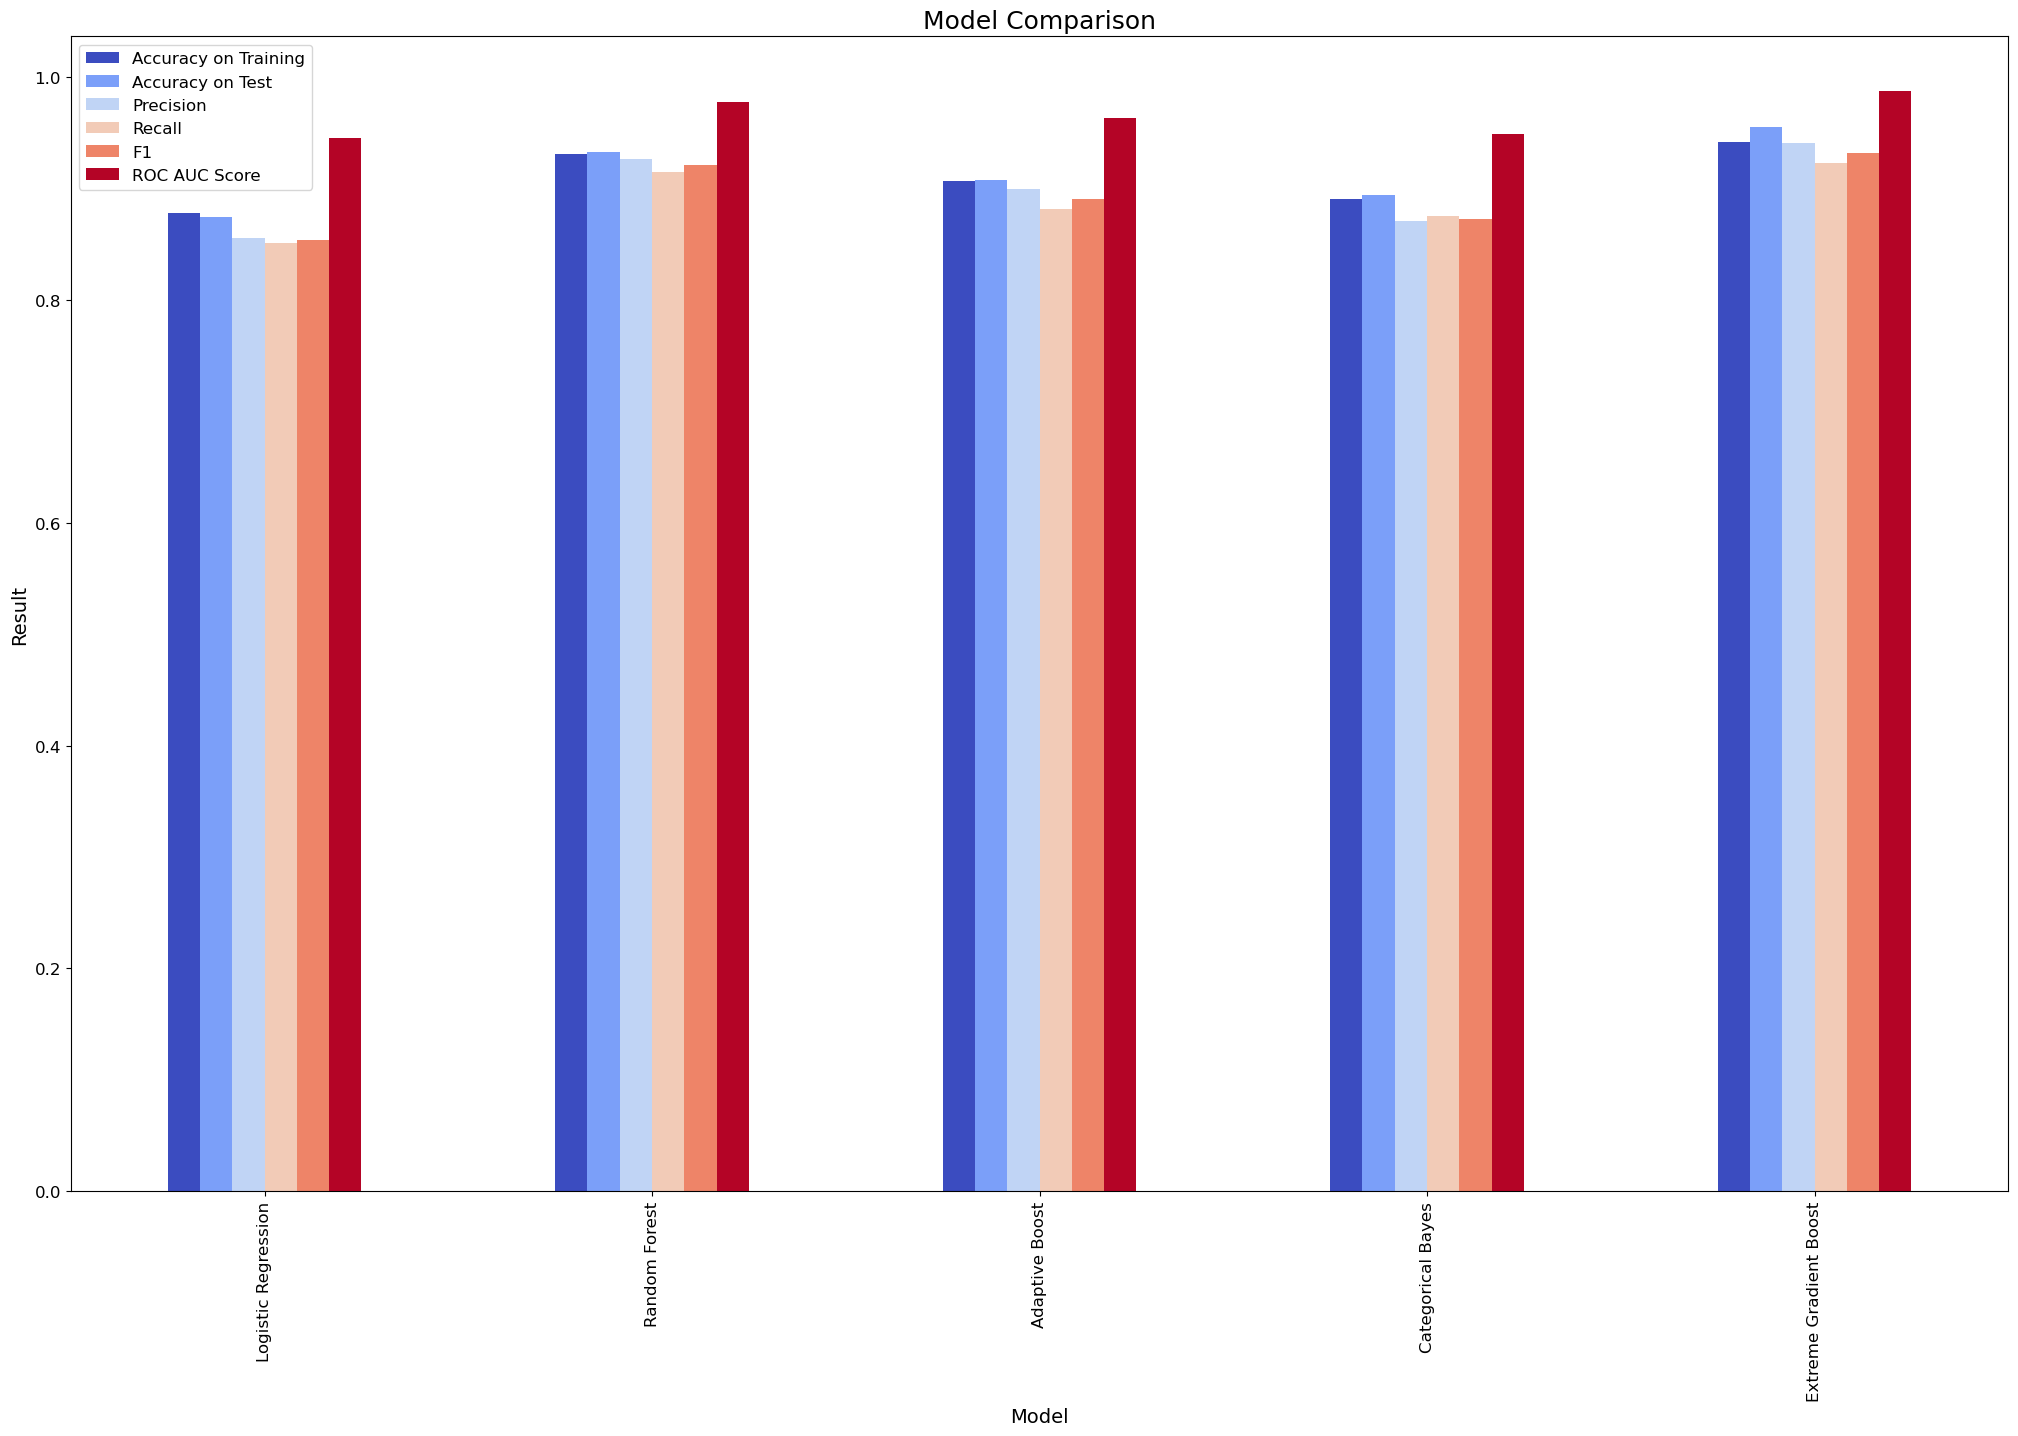

In [115]:
# Plotting each model's performance scores vs time elapsed
plt.rcParams["figure.figsize"] = (25,15)

ax1 = model_data.plot.bar(x = 'Model', y = ["Accuracy on Training", "Accuracy on Test", "Precision", "Recall",
                                           "F1", "ROC AUC Score"], 
                          cmap = 'coolwarm')
ax1.legend()

ax1.set_title("Model Comparison", fontsize = 18)
ax1.set_xlabel('Model', fontsize = 14)
ax1.set_ylabel('Result', fontsize = 14, color = 'Black');

**Observations :** At this point if I were to be packaging a model pipeline to recommend to a client, I would be promoting the Extreme Gradient Boosting, aka XGBoost algorithm. Although the model had not performed the most efficiently, it did have the most effective performance.

#### Feature importance of finalist pipeline - Extreme Gradient Boosting Classifier (XGBoost)
Metric: Weight

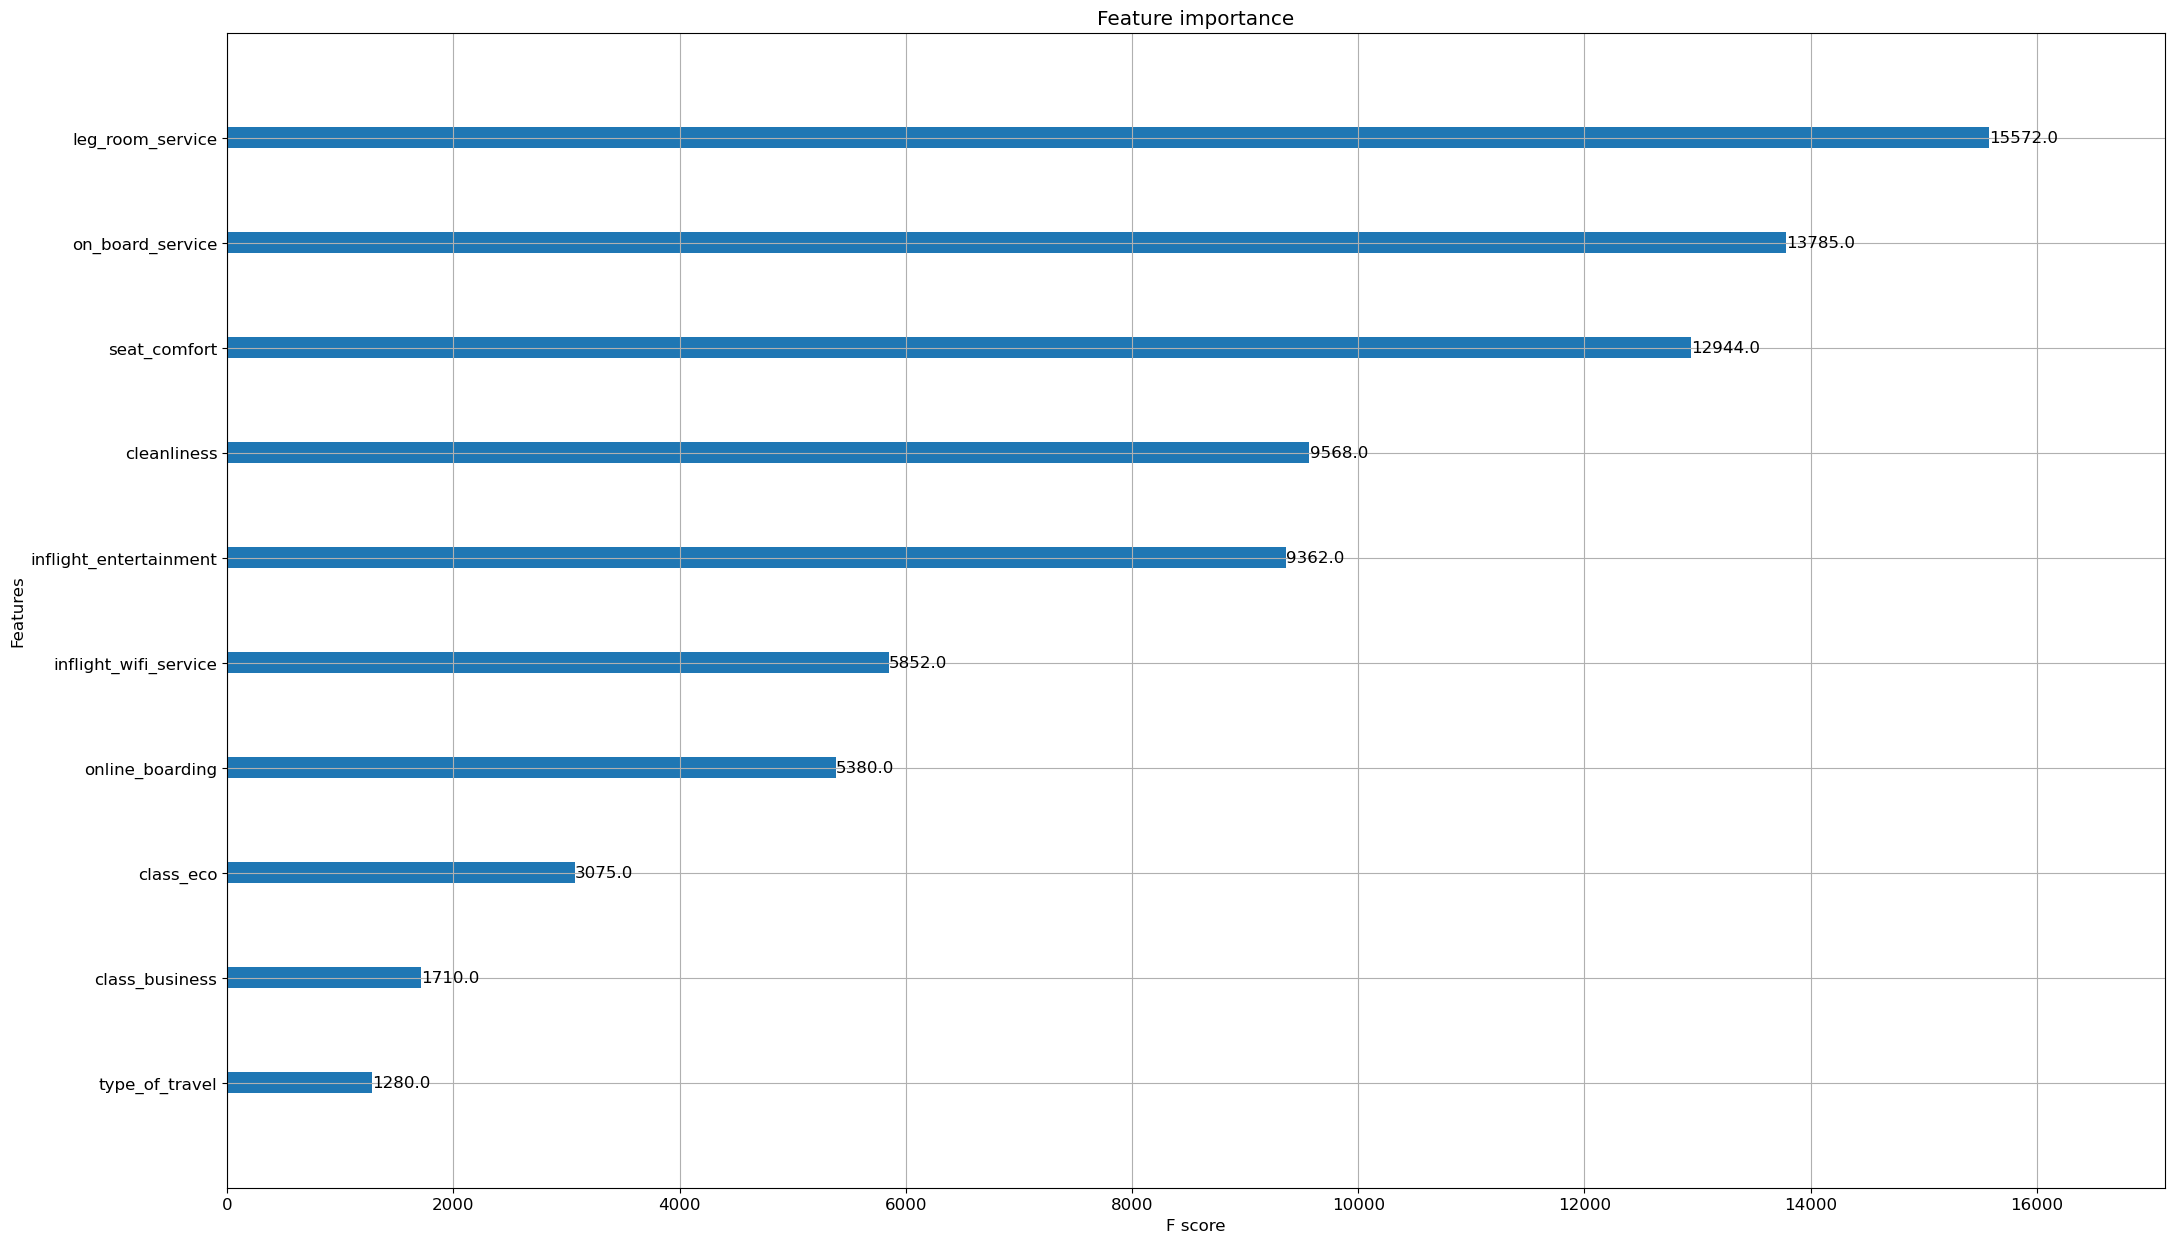

In [116]:
from xgboost import plot_importance

model_xgb.get_booster().feature_names = ['type_of_travel', 'inflight_wifi_service', 'online_boarding',
       'seat_comfort', 'inflight_entertainment', 'on_board_service',
       'leg_room_service', 'cleanliness', 'class_business', 'class_eco']

plot_importance(model_xgb)
plt.show()

**Observations :** In terms of feature weight (the amount of times a feature was used to split the data) — our model used the seat comfort feature the most to split the data across all possible trees in our model; followed by online boarding, inflight entertainment, onboard service quality, leg room, inflight wi-fi, and cleanliness.

## <a name="deployment">6. Packaging and Explainability</a>

### Packaging the model
#### Saving the model with pickle

In [117]:
import pickle

# Saving test model. 
pickle.dump(model_xgb, open('./Models/model_xgb.pkl', 'wb'))

#### Loading the model with pickle

In [118]:
pickled_model = pickle.load(open('./Models/model_xgb.pkl', 'rb'))

In [119]:
X_test

type_of_travel  inflight_wifi_service  online_boarding  seat_comfort  \
0                   1                    4.0              3.0           2.0   
1                   1                    0.0              3.0           4.0   
4                   1                    1.0              0.0           1.0   
5                   1                    2.0              4.0           2.0   
6                   1                    4.0              4.0           4.0   
...               ...                    ...              ...           ...   
25971               1                    2.0              2.0           3.0   
25972               1                    3.0              3.0           3.0   
25973               0                    1.0              0.0           1.0   
25974               1                    2.0              3.0           3.0   
25975               0                    1.0              1.0           1.0   

       inflight_entertainment  on_board_service  leg_room_service  \
0                         4.0               4.0               4.0   
1                         3.0               3.0               3.0   
4                         1.0               1.0               1.0   
5                         4.0               3.0               2.0   
6                         4.0               4.0               4.0   
...                       ...               ...               ...   
25971                     3.0               2.0               1.0   
25972                     3.0               3.0               4.0   
25973                     1.0               3.0               2.0   
25974                     3.0               2.0               1.0   
25975                     0.0               0.0               1.0   

       cleanliness  class_business  class_eco  
0              4.0           False       True  
1              4.0            True      False  
4              3.0           False       True  
5              4.0           False       True  
6              2.0            True      False  
...            ...             ...        ...  
25971          3.0            True      False  
25972          3.0            True      False  
25973          1.0           False       True  
25974          3.0            True      False  
25975          0.0           False       True  

[23863 rows x 10 columns]

In [120]:
pickled_model.predict(X_test)

array([1, 1, 0, ..., 0, 1, 0])

### Model Explainability using SHAP

In [121]:
# !pip install shap
import shap

In [122]:
explainer = shap.Explainer(model_xgb, feature_names = features)

In [123]:
# Explain feature importance in producing model output from base value to actual output
shap_values = explainer(X_train)

In [124]:
shap_values.values[0]

array([-3.814307  , -3.2896557 , -1.481405  ,  0.12752466, -0.05324198,
       -0.00868611, -0.15118219,  0.02121987, -0.69011265,  0.08328845],
      dtype=float32)

#### Feature Importance

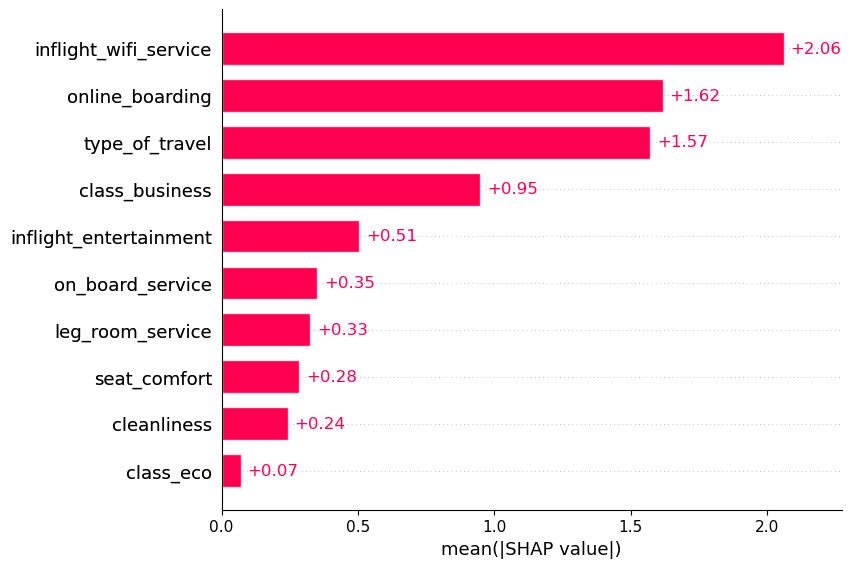

In [125]:
shap.plots.bar(shap_values)

#### Global feature explainability

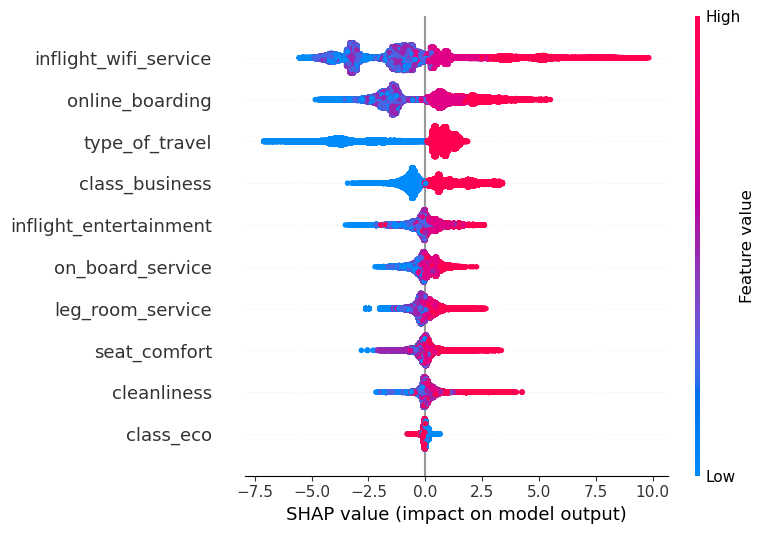

CPU times: total: 4.89 s
Wall time: 4.9 s


In [126]:
%%time
shap.initjs()
shap.summary_plot(shap_values, X_train, class_names=model_xgb.classes_)

**Observations :** Considering the mean SHAP value as our metric for feature importance, we can observe that in-flight wi-fi service is the most impactful feature of our data, followed closely by travel type and online boarding.

Looking at the SHAP summary plot (or beeswarm) which provides a more informative illustration of the feature value of each individual observation in our data and its impact on the model output — we can get a more complete picture of the overall feature impact on our model. The features are also ordered by their impact on prediction, but it also shows us how higher and lower values of each individual observation of a feature will affect the result.

For almost every feature, high feature values have a positive impact on prediction while low feature values have a negatie impact on prediction.

#### Explaining ```inflight_wifi_service``` feature impact

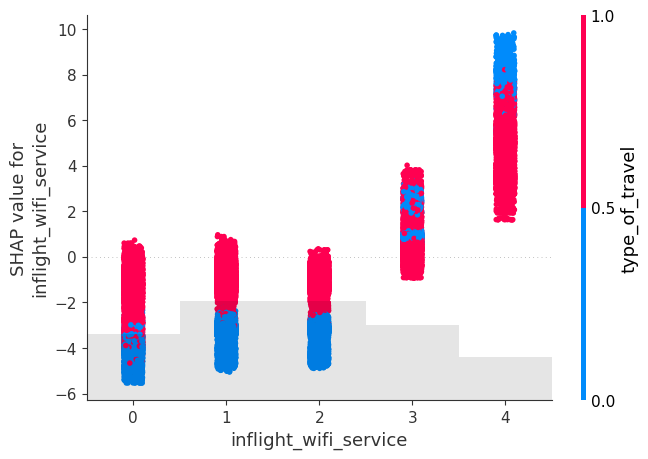

In [127]:
shap.plots.scatter(shap_values[:, "inflight_wifi_service"], color=shap_values)

**Observations :** I wanted to take a closer look into the in-flight wi-fi feature. One, because it is the feature that had the most impact in determining model output; but also particularly because it was a feature that drew my attention during exploratory analysis, seeing as how certain values had high impact driving satisfaction and dissatisfaction among different travel classes and travel types.

To refresh - for travel type I encoded personal travel as 0 and business travel as 1. The manner in which the model utilizes this feature almost directly mirrors the data itself. Where high rankings by leisure travelers has a more informative impact on determining satisfaction and low ratings have more impact on dissatisfaction. 

It can also be observed that for business travelers, regardless of how they rated the wi-fi service, there is a portion that are satisfied (positive SHAP value over negatie). However, the group of business travelers who displayed negative SHAP values or were dissatisfied gave low marks to their experience with wi-fi on board.

#### Explaining ```online_boarding``` feature impact

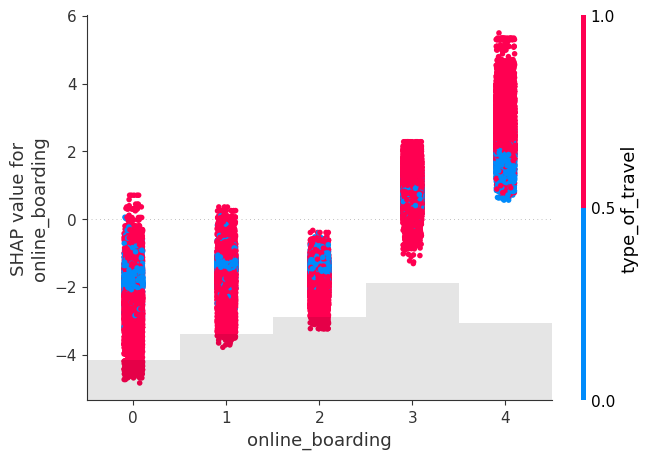

In [128]:
shap.plots.scatter(shap_values[:, "online_boarding"], color=shap_values)

**Observations :** I also wanted to take a quick look at the SHAP impact of online boarding. This is another feature which showed high impact potential, regardless of travel reason or class.

Similarly to what we observed in exploratory analysis - low marks of the boarding process, regardless of travel reason had a negative impact on the model output, pointing towards passenger dissatisfaction. Whereas high remarks were consistent with customers who were more or less satisfied with their overall travel experience.

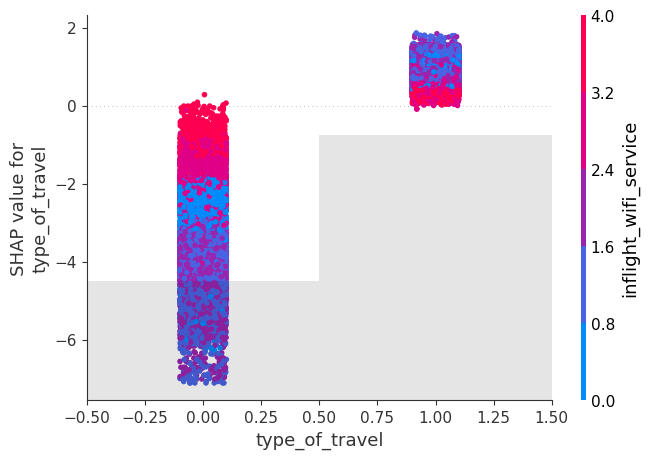

In [129]:
shap.plots.scatter(shap_values[:, 'type_of_travel'], color=shap_values)


In [131]:
import lime
import lime.lime_tabular
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=features, class_names=model_xgb.classes_)

# Define a function to predict using your model
predict_fn = lambda x: model_xgb.predict_proba(x)

# Select an instance from your dataset for explanation (e.g., the first instance)
instance = X_train[0]

# Explain the instance using LIME
exp = explainer.explain_instance(instance, predict_fn, num_features=len(features))

# Visualize the explanation
exp.show_in_notebook(show_table=True)


#apply id as index== analyze by client (not ind var but as index : not run in model but just used in deep analysis)
#Demo: create free account AWS: how to put the model in cloud: front end application: how to put shap and lime : Dash and streamled
#Serve AI application : understand the elements on AWS how to put ML model into production  and serve using apps like dash and streamled
#Excel : what are the components; understand the cloud, inspire from the demos , think about how to share the rsults in a frontend app

In [132]:
import lime
import lime.lime_tabular
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Initialize LIME explainer with custom parameters
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, 
                                                   feature_names=features, 
                                                   class_names=model_xgb.classes_,
                                                   discretize_continuous=False,  # Disable discretization for continuous features
                                                   kernel_width=0.5,  # Adjust the kernel width for the local linear model
                                                   verbose=True)

# Define a function to predict using your model
predict_fn = lambda x: model_xgb.predict_proba(x)

# Select an instance from your dataset for explanation (e.g., the first instance)
instance = X_train[0]

# Explain the instance using LIME with more samples and features
exp = explainer.explain_instance(instance, 
                                  predict_fn, 
                                  num_features=len(features),  # Number of features to include in the explanation
                                  num_samples=1000)  # Number of samples to generate

# Visualize the explanation
exp.show_in_notebook(show_table=True)


Intercept 0.00011181864297356707
Prediction_local [8.74513585e-05]
Right: 6.96124e-05


In [136]:
import lime
import lime.lime_tabular
from sklearn.linear_model import LogisticRegression

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, 
                                                   feature_names=X_train.columns,
                                                   class_names=["No", "Yes"],
                                                   discretize_continuous=False)

# Explain the instance using LIME
explanation = explainer.explain_instance(X_train[0],  # Instance of interest
                                         model.predict_proba,  # Predict function of your model
                                         num_features=4,  # Number of features to include in the explanation
                                         top_labels=1)  # Number of top labels to explain

# Visualize the explanation
explanation.show_in_notebook()



AttributeError: 'numpy.ndarray' object has no attribute 'columns'

## <a name="conclusions">7. Conclusions</a>

At this point I would be able to confidently present to the client that we have data-informed recommendations on where they can improve their customer service, evidenced by an intepretable XGBoost machine learning pipeline that exhibits 95% accuracy and 94.6% precision.

To summarize, it's very crucial to focus on how efficiently passengers get on the plane, and how they're treated while on board.

There is an fundamental difference in satisfaction given how customers react to certain service qualities given their reason for travel. Most important among these service aspects is the quality of in-flight wi-fi service on board. 

Regardless of cabin or travel purpose, high marks in wi-fi capabilities is a huge opportunity for increasing customer satisfaction and expanding competitive advantage. Increasing something like availability, making wi-fi complimentary in all cabins would draw in more customers who have readily available video and music streaming. Improving capability is something that would draw in more business travelers knowing that they can increase productivity while in the air. 


The efficiency of getting people on board the plane is also something to be improved upon. This isn't specific to one cabin class or purpose of travel - it's universal. Passengers who provided higher marks in boarding the plane were reported to be satisfied with their travel experience, while passengers who gave mediocre or low marks were not. 

Secondary to those features, there's also opportunity to grow in terms of the quality of in-flight entertainment, food and beverage, seat comfort, cabin cleanliness, and leg room.

I think it's important that the airline focus on improving these key service aspects to improve customer satisfaction, customer retention, and to establish or expand their competitive advantage against other carriers.